<img src=assets/UBA_header.png>

# **Universidad de Buenos Aires**

### Carrera de Especialización en Inteligencia Artificial
<br>

## **Proyecto final - Aprendizaje de Máquina**

### Cohorte 22 - Año 2025

## Autores
- [SIU a2208] Ariel Matias Cabello <arielmcabello@gmail.com>
- [SIU a2213] Ignacio Agustin Costarelli <agustin@costarellisa.com.ar>
- [SIU a2214] Alex Martín Curellich <alexcurellich@gmail.com>
<br>
<br>


___

# Índice

## 1. Análisis Exploratorio de Datos (EDA)
1.1. Revisión general del dataset  
1.2. Distribución de variables numéricas  
1.3. Distribución de variables categóricas  
1.4. Análisis de valores faltantes y duplicados  
1.5. Identificación de outliers y posibles inconsistencias  
1.6. Análisis de correlaciones entre variables  
**Resumen EDA**

## 2. Preprocesamiento y preparación de los datos
2.1. Definición de métricas y modelos a utilizar  
2.1.1. Métricas principales  
2.1.2. Contexto del problema y consecuencia de los errores  
2.1.3. Función de evaluación unificada  
2.1.4. Selección de modelos y criterios de comparación  

2.2. Preprocesamiento de datos  
2.2.1. Split inicial de datos  
2.2.2. Análisis de valores faltantes en train y test  
2.2.3. Estrategia de preprocesamiento  
2.2.4. Implementación del pipeline de preprocesamiento  
2.2.5. Aplicación de las transformaciones  
2.2.6. Preparación de la variable objetivo  
2.2.7. Mapeo de datasets preprocesados por modelo  
**Resumen del preprocesamiento**

## 3. Modelización: Construcción, entrenamiento y evaluaciones parciales
3.1. Importación de modelos y configuración inicial  
3.2. Modelo 1: Logistic Regression  
3.3. Modelo 2: Naive Bayes  
3.4. Modelo 3: Decision Tree
3.4.1. Análisis de Overfitting en Decision Tree  
3.5. Modelo 4: Random Forest  
3.5.1. Análisis de Overfitting en Random Forest
3.6. Modelo 5: Gradient Boosting  

## 4. Evaluación de Resultados
4.1. Comparación de los modelos utilizados  
4.2. Selección del modelo más acorde    
4.3. Conclusiones


___

# DESARROLLO



# Imports y config iniciales

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns

# Ingesta del dataset

In [351]:
path = pathlib.Path("dataset/one_million_mushrooms.csv")
df = pd.read_csv(path, delimiter=';')

# 1. Analisis exploratorio de datos (EDA)

Antes de abordar cualquier modelo de aprendizaje automático, resulta fundamental realizar un análisis exploratorio de los datos (EDA). Este proceso nos permite comprender la estructura del conjunto de datos, detectar posibles inconsistencias o valores faltantes, identificar relaciones entre variables y, en general, obtener una primera impresión de la información disponible. En tal sentido se llevó a cabo un análisis etructurado según las siguientes etapas:

- Revisión general del dataset
- Distribución de variables numéricas
- Distribución de variables categóricas
- Análisis de valores faltantes y duplicados
- Identificación de outliers y posibles inconsistencias
- Análisis de correlaciones entre variables

### 1.1. Revisión general del dataset

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038000 entries, 0 to 1037999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   class                 1038000 non-null  object 
 1   cap-diameter          1038000 non-null  float64
 2   cap-shape             1038000 non-null  object 
 3   cap-surface           798000 non-null   object 
 4   cap-color             1038000 non-null  object 
 5   does-bruise-or-bleed  1038000 non-null  object 
 6   gill-attachment       870000 non-null   object 
 7   gill-spacing          612000 non-null   object 
 8   gill-color            1038000 non-null  object 
 9   stem-height           1038000 non-null  float64
 10  stem-width            1038000 non-null  float64
 11  stem-root             162000 non-null   object 
 12  stem-surface          390000 non-null   object 
 13  stem-color            1038000 non-null  object 
 14  veil-type             54000 non-nu

| Columna               | Tipo    | Descripción general                                                                              | Valores posibles                                                                                                                                            |
|------------------------|---------|---------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| class                  | categ. | Clase del hongo según su toxicidad                                                                | e = comestible, p = venenoso                                                                                                                                |
| cap-diameter (cm)      | num.   | Diámetro del sombrero (píleo)                                                                      | número flotante en cm                                                                                                                                       |
| cap-shape              | categ. | Forma del sombrero                                                                                | b = campana, c = cónica, x = convexa, f = plana, s = hundida, p = esférica, o = otras                                                                        |
| cap-surface            | categ. | Textura de la superficie del sombrero                                                             | i = fibrosa, g = con surcos, y = escamosa, s = lisa, h = brillante, l = coriácea, k = sedosa, t = pegajosa, w = arrugada, e = carnosa                        |
| cap-color              | categ. | Color del sombrero                                                                               | n = marrón, b = beige, g = gris, r = verde, p = rosa, u = púrpura, e = rojo, w = blanco, y = amarillo, l = azul, o = naranja, k = negro                        |
| does-bruise-bleed      | categ. | Indica si presenta moretones o sangrado al cortarse                                              | t = sí, f = no                                                                                                                                              |
| gill-attachment        | categ. | Forma en que las laminillas se unen al tallo                                                     | a = adnada, x = adnexada, d = decurrente, e = libre, s = sinuada, p = poros, f = ninguna, ? = desconocido                                                   |
| gill-spacing           | categ. | Separación entre las laminillas                                                                 | c = cerrada, d = distante, f = ninguna                                                                                                                     |
| gill-color             | categ. | Color de las laminillas                                                                          | igual a cap-color + f = ninguna                                                                                                                            |
| stem-height (cm)       | num.   | Altura del tallo                                                                                | número flotante en cm                                                                                                                                       |
| stem-width (mm)        | num.   | Grosor del tallo                                                                                | número flotante en mm                                                                                                                                       |
| stem-root              | categ. | Forma de la base del tallo                                                                      | b = bulbosa, s = hinchada, c = en maza, u = copa, e = igual, z = rizomorfa, r = enraizada, f = plana                                                                   |
| stem-surface           | categ. | Textura de la superficie del tallo                                                              | igual a cap-surface + f = ninguna                                                                                                                          |
| stem-color             | categ. | Color del tallo                                                                                | igual a cap-color + f = ninguno                                                                                                                            |
| veil-type              | categ. | Tipo de velo                                                                                   | p = parcial, u = universal                                                                                                                                  |
| veil-color             | categ. | Color del velo                                                                                 | igual a cap-color + f = ninguno                                                                                                                            |
| has-ring               | categ. | Indica si el tallo tiene anillo                                                                | t = sí, f = no                                                                                                                                              |
| ring-type              | categ. | Tipo de anillo                                                                                 | c = telaraña, e = evanescente, r = abierto, g = surcado, l = grande, p = colgante, s = envolvente, z = zona, y = escamoso, m = móvil, f = ninguno, ? = desconocido |
| spore-print-color      | categ. | Color de la impresión de esporas                                                                | igual a cap-color                                                                                                                                          |
| habitat                | categ. | Hábitat donde crece                                                                            | g = pastos, l = hojas, m = praderas, p = senderos, h = brezales, u = urbano, w = desechos, d = bosques                                                      |
| season                 | categ. | Estación en que aparece                                                                        | s = primavera, u = verano, a = otoño, w = invierno                                                                                       

Como se puede observar en la información precedente, el dataset contiene 1.038.000 registros y 21 columnas, de las cuales 18 son categóricas y 3 numéricas (`cap-diameter`, `stem-height` y `stem-width`).<br>
<br>
La variable objetivo (`class`) indica si el hongo es comestible (`e`) o venenoso (`p`), tratándose entonces de un problema de clasificación binaria.<br>
<br>
La inspección con `df.info()` permitió confirmar que varias columnas presentan valores faltantes en diferentes proporciones. Esto nos sugiere la necesidad de tratarlos (imputación, eliminación o transformación) según su relevancia en el modelado. Este tema se abordará más adelante.

In [353]:
df.head(5)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,5.68,c,e,w,t,x,c,r,6.73,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,u
1,e,5.62,f,s,n,f,s,c,w,6.10,...,b,i,n,NaN,NaN,f,f,NaN,m,u
2,p,17.29,x,s,n,f,p,NaN,y,6.80,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
3,p,6.16,b,s,n,f,NaN,NaN,w,9.33,...,NaN,s,w,NaN,NaN,t,z,NaN,d,s
4,p,4.46,o,t,n,f,NaN,c,w,0.00,...,f,f,f,NaN,NaN,f,f,n,d,u


### 1.2. Distribución de variables numéricas

In [354]:
df.describe()

,cap-diameter,stem-height,stem-width
count,1.038000e+06,1.038000e+06,1.038000e+06
mean,6.737280e+00,6.588308e+00,1.215534e+01
std,5.249366e+00,3.375367e+00,1.001048e+01
min,3.000000e-01,0.000000e+00,-2.750000e+00
25%,3.500000e+00,4.640000e+00,5.210000e+00
50%,5.880000e+00,5.960000e+00,1.018000e+01
75%,8.540000e+00,7.750000e+00,1.660000e+01
max,6.656000e+01,3.615000e+01,1.055000e+02


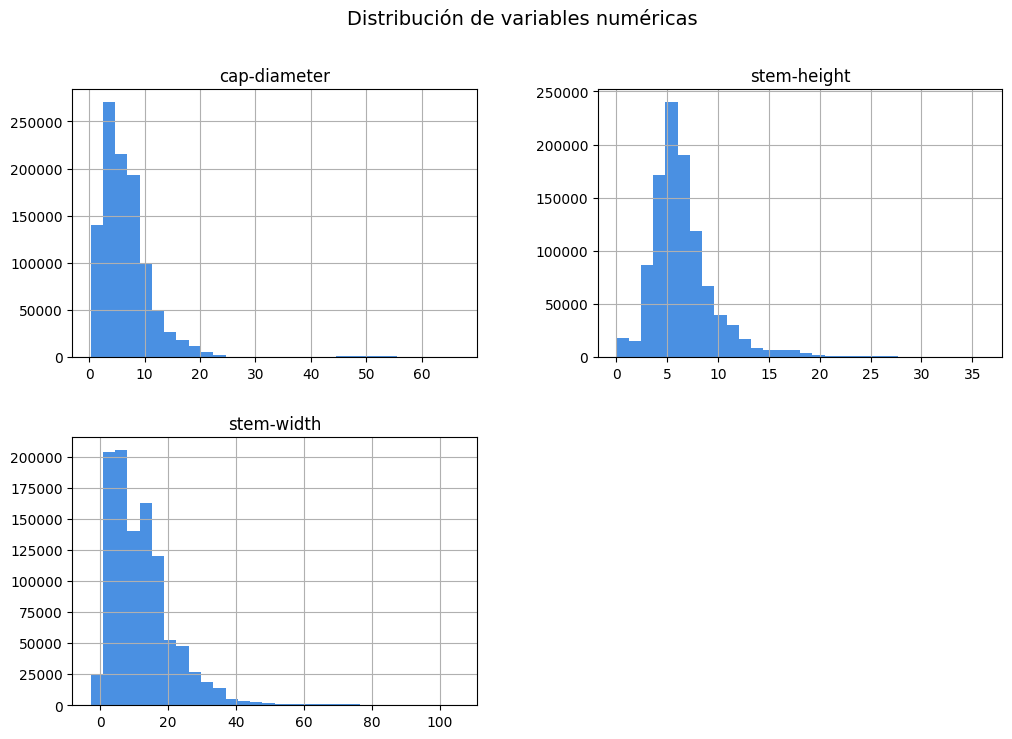

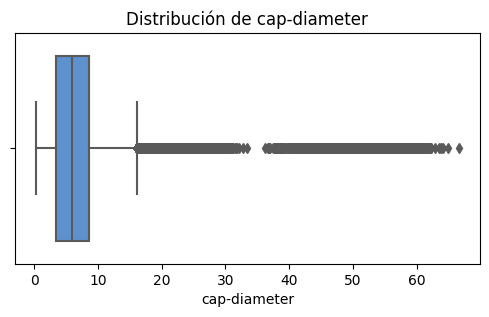

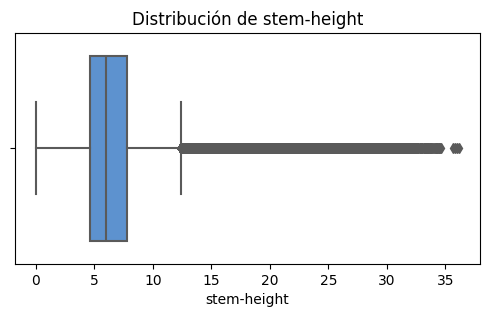

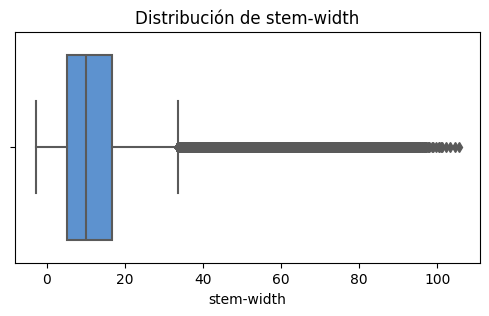

In [355]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(bins=30, figsize=(12,8), color='#4a90e2')
plt.suptitle('Distribución de variables numéricas', fontsize=14)
plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color='#4a90e2')
    plt.title(f'Distribución de {col}')
    plt.show()


Como pudimos observar, el análisis numérico mostró que:

- Los valores de `cap-diameter`, `stem-height` y `stem-width` presentan una distribución sesgada positivamente (*right-skewed distribution*). Evidencian a primera vista posibles outliers.

- Se detectaron valores atípicos potenciales, como `stem-width` negativo o `stem-height` igual a cero, lo que podría indicar errores de medición o registro.

### 1.3. Distribución de variables categóricas

In [356]:
df.describe(include=['object'])

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,1038000,1038000,798000,1038000,1038000,870000,612000,1038000,162000,390000,1038000,54000,126000,1038000,996000,108000,1038000,1038000
unique,2,7,11,12,2,7,3,12,5,8,13,1,6,2,8,7,8,4
top,p,x,t,n,f,a,c,w,b,s,w,u,w,f,f,k,d,a
freq,576000,457326,138461,415920,858000,216055,420000,314585,54000,101929,389907,54000,92989,780000,822000,36003,751259,514753


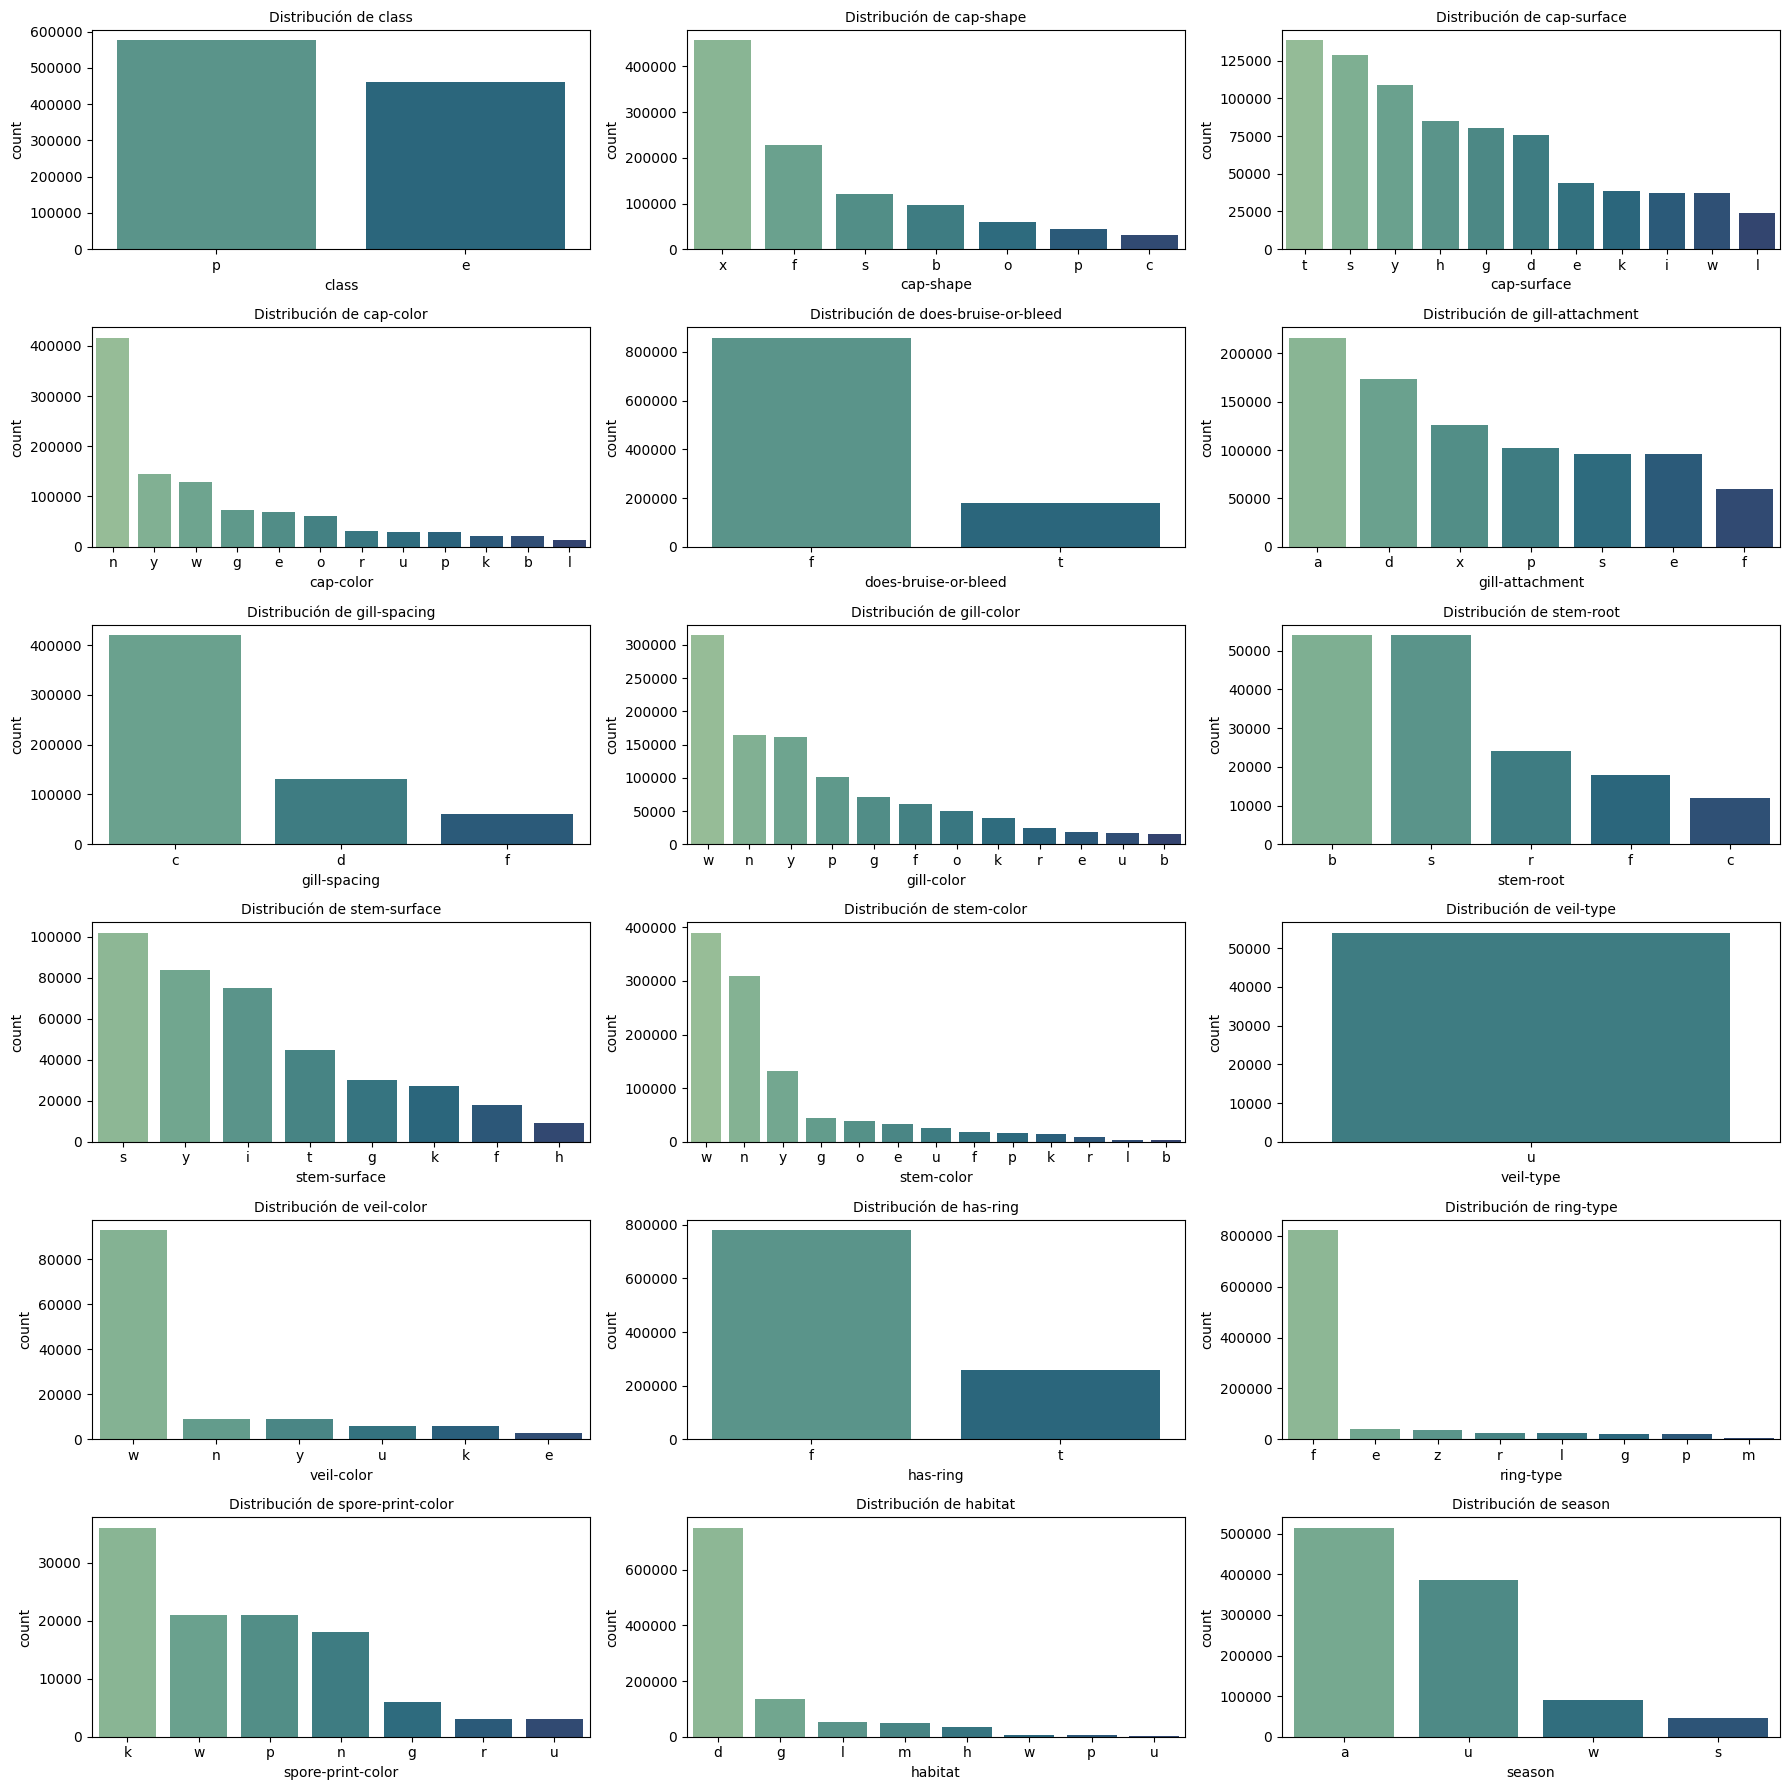

In [357]:
categorical_cols = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(6, 3, figsize=(18, 18))
axes = axes.flatten() 


for i, col in enumerate(categorical_cols[:18]): 
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='crest', ax=axes[i])
    axes[i].set_title(f'Distribución de {col}', fontsize=10)
    axes[i].tick_params(axis='x', rotation=0)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Las estadísticas de las variables categóricas mostraron:
- Varios atributos con alta cardinalidad (por ejemplo, `cap-color` con 12 categorías y `stem-color` con 13).

- La variable `veil-type` tiene una sola categoría (“u”) y gran cantidad de faltantes, lo que indica que no aporta información, por lo tanto, podría eliminarse del análisis.

- **La distribución de la variable `class` (target) está levemente desbalanceada, con 57.6% de hongos venenosos y 42.4% comestibles, algo a tener en cuenta en la etapa de modelado.**

### 1.4. Análisis de valores faltantes y duplicados

In [358]:
# Busqueda de "?" como valores faltantes
(df == "?").any()

 # Reemplazo de "?"" por NaN (comentado por ahora porque no hay)
# df = df.replace('?', np.nan)

class                   False
cap-diameter            False
cap-shape               False
cap-surface             False
cap-color               False
does-bruise-or-bleed    False
gill-attachment         False
gill-spacing            False
gill-color              False
stem-height             False
stem-width              False
stem-root               False
stem-surface            False
stem-color              False
veil-type               False
veil-color              False
has-ring                False
ring-type               False
spore-print-color       False
habitat                 False
season                  False
dtype: bool

In [359]:
df.isnull().sum()

class                        0
cap-diameter                 0
cap-shape                    0
cap-surface             240000
cap-color                    0
does-bruise-or-bleed         0
gill-attachment         168000
gill-spacing            426000
gill-color                   0
stem-height                  0
stem-width                   0
stem-root               876000
stem-surface            648000
stem-color                   0
veil-type               984000
veil-color              912000
has-ring                     0
ring-type                42000
spore-print-color       930000
habitat                      0
season                       0
dtype: int64

<Axes: >

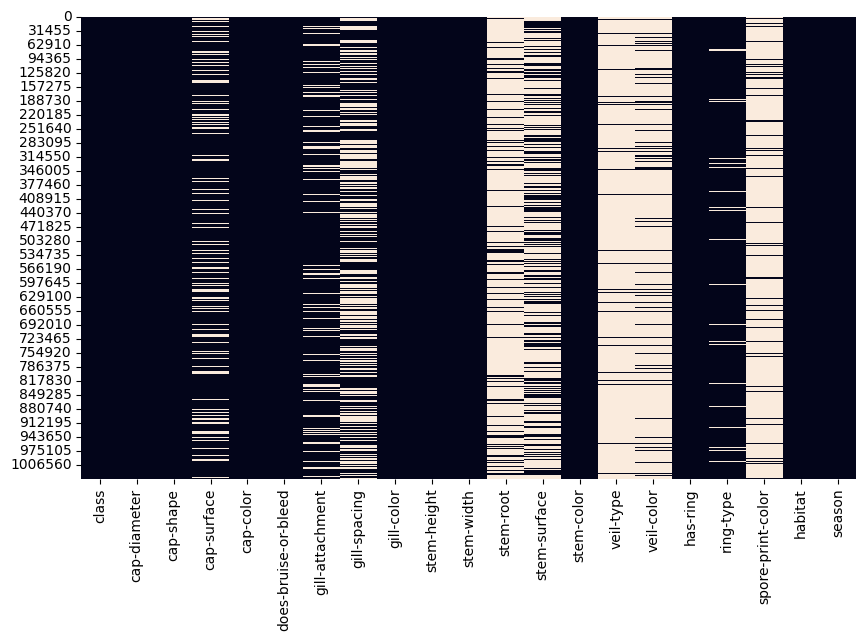

In [360]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)

                      Valores faltantes  Porcentaje (%)
veil-type                        984000       94.797688
spore-print-color                930000       89.595376
veil-color                       912000       87.861272
stem-root                        876000       84.393064
stem-surface                     648000       62.427746
gill-spacing                     426000       41.040462
cap-surface                      240000       23.121387
gill-attachment                  168000       16.184971
ring-type                         42000        4.046243
class                                 0        0.000000
stem-color                            0        0.000000
habitat                               0        0.000000
has-ring                              0        0.000000
stem-width                            0        0.000000
cap-diameter                          0        0.000000
stem-height                           0        0.000000
gill-color                            0        0

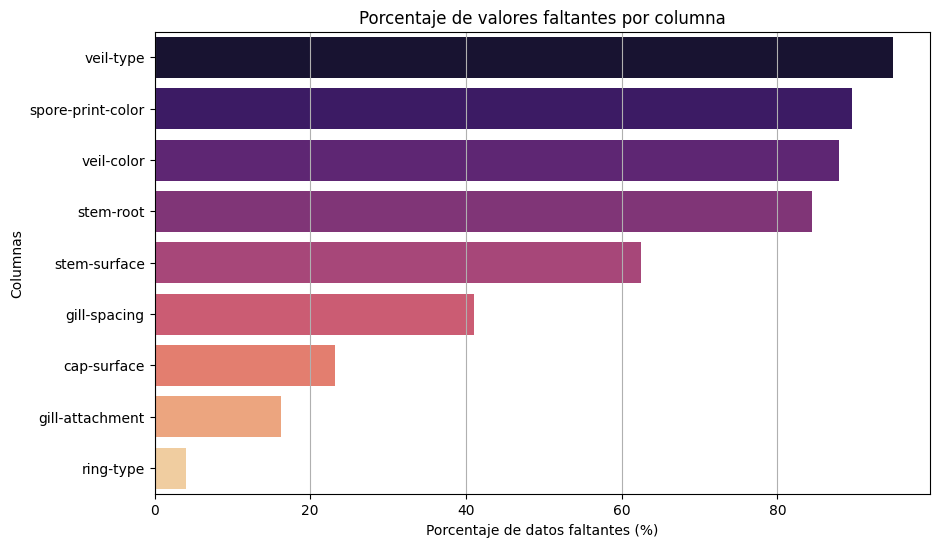

In [361]:
# Faltantes
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Valores faltantes': missing, 'Porcentaje (%)': missing_percent})

print(missing_df)

# Duplicados
duplicates = df.duplicated().sum()
print("-"*60)
print(f"Numero de filas duplicadas: {duplicates:,}")
print(f"Porcentaje de duplicados: {(duplicates / len(df)) * 100:.2f}%")

plt.figure(figsize=(10,6))
sns.barplot(x=missing_percent[missing_percent > 0], 
            y=missing_percent[missing_percent > 0].index, 
            palette='magma')
plt.title('Porcentaje de valores faltantes por columna')
plt.xlabel('Porcentaje de datos faltantes (%)')
plt.ylabel('Columnas')
plt.grid(axis='x')
plt.show()

Al examinar la cantidad y el porcentaje de valores faltantes por columna, se observó que el dataset presenta niveles significativos de ausencia de datos en varias variables. En particular:

- `veil_type` tiene un 94.8% de valores faltantes.

- `spore_print_color`, `veil_color` y `stem_root` también presentan más del 80% de datos ausentes.

- Otras variables como `stem_surface` (62.4%), `gill_spacing` (41%) y `cap_surface` (23%) muestran una cantidad intermedia de faltantes, mientras que el resto posee datos completos.

Estas proporciones indican que ciertas columnas aportan muy poca información útil o su imputación podría introducir un sesgo considerable. En particular, *veil_type*, con casi todos los valores nulos, probablemente deba ser eliminada del conjunto de datos, ya que no ofrece variabilidad ni información relevante. Para los casos intermedios, como cap-surface o gill-spacing, podríamos evaluar la imputación mediante otro parámetro como la moda o la media.
Por lo expresado anteriormente, concluímos que el dataset requiere un proceso de limpieza, priorizando la eliminación o imputación de variables con altos porcentajes de faltantes antes de continuar con la etapa de preprocesamiento. 

### 1.5. Identificación de outliers y posibles inconsistencias
Para este análisis se utilizó el método del rango intercuartílico (IQR). La elección de este método la justificamos en lo siguiente:
- No depende de la distribución (no asume normalidad). Esto es importante ya que, como se puede observar en los gráficos de *2. Distribución de variables numéricas*, dichas variables justamente no siguen una distribución normal.
- Es robusto frente a valores extremos. Los cuartiles no se ven afectados significativamente por pocos valores atípicos.

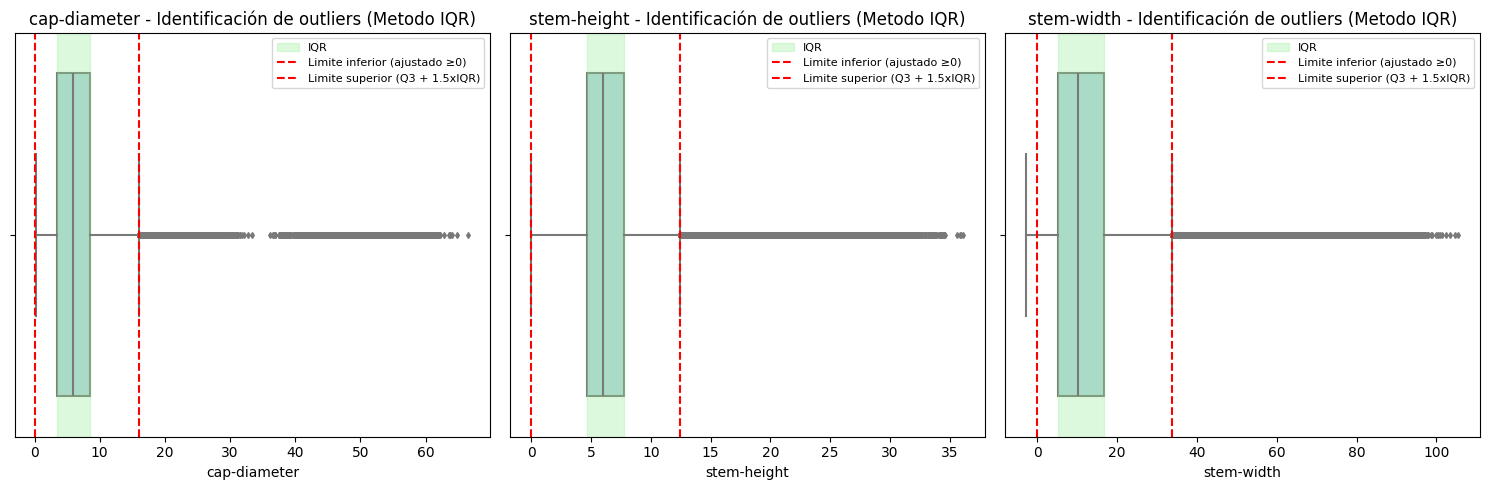

In [362]:
variables = ['cap-diameter', 'stem-height', 'stem-width']

plt.figure(figsize=(15, 5))

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = max(Q1 - 1.5 * IQR, 0)  # el límite inferior lo recortamos en 0 para evidenciar valores atípicos
    upper_limit = Q3 + 1.5 * IQR

    sns.boxplot(x=df[var], color="lightblue", fliersize=3)
    
    plt.axvspan(Q1, Q3, color="lightgreen", alpha=0.3, label="IQR")
    
    plt.axvline(lower_limit, color="red", linestyle="--", label="Limite inferior (ajustado ≥0)")
    plt.axvline(upper_limit, color="red", linestyle="--", label="Limite superior (Q3 + 1.5xIQR)")

    plt.title(f"{var} - Identificación de outliers (Metodo IQR)")
    plt.xlabel(var)
    plt.legend(loc="upper right", fontsize=8)

plt.tight_layout()
plt.show()


**Los resultados indicaron que los outliers representan menos del 3% del total de observaciones, por lo que se consideró un nivel aceptable para continuar con el análisis sin comprometer la representatividad de los datos.**

### 1.6. Análisis de correlaciones entre variables

Para este análisis exploratorio, se buscó evaluar la fuerza de relación entre cada variable del dataset y la variable objetivo `class`, la cual indica si el hongo es o no comestible.
Dado que el dataset contiene tanto variables numéricas como categóricas, no pudimos usar un único método de correlación para todo el conjunto (cada tipo de variable requiere un tratamiento distinto). Por esta razon decidimos utilizar:
- **Cramér's V**: basada en el estadístico Chi-cuadrado, útil para estimar la asociación *entre variables categóricas*. En este caso, se usó para ver qué variables categóricas están más relacionadas con la clase objetivo ('class').

- **η — Correlation Ratio**: La correlación η (eta) mide la asociación *entre una variable numérica y una variable categórica* y permite capturar relaciones no lineales. La usamos para medir cómo se relacionan las variables numéricas con la clase objetivo.

c:\Users\ariel\AppData\Local\pypoetry\Cache\virtualenvs\ceia-ml-mushroom-classification-RFpc2XvD-py3.12\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


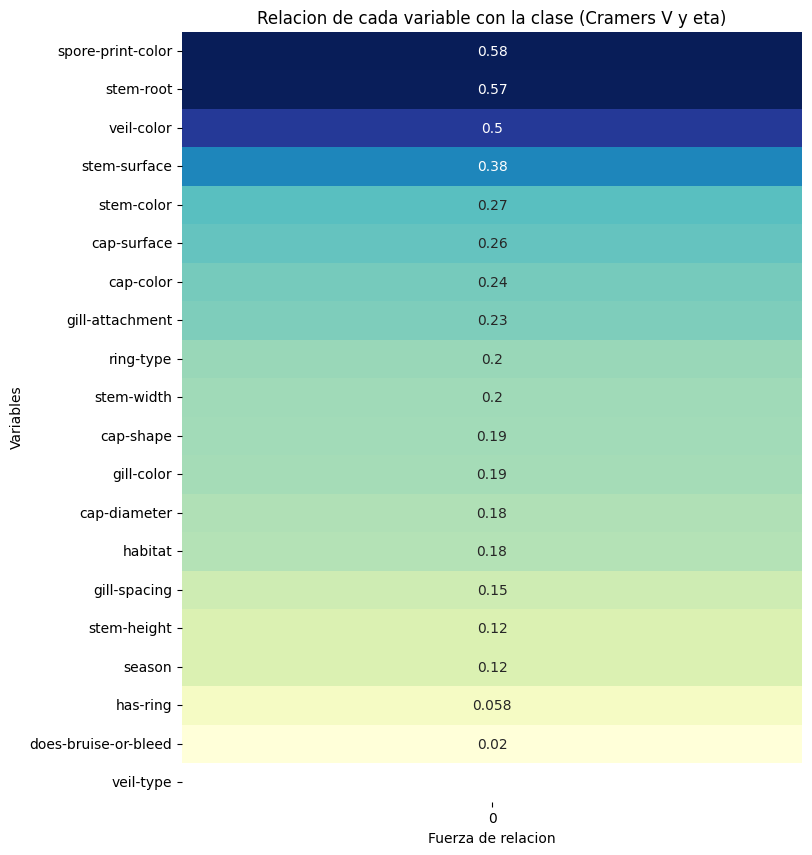

In [363]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    denom = min((kcorr - 1), (rcorr - 1))
    if denom <= 0:
        return np.nan
    return np.sqrt(phi2corr / denom)

def correlation_ratio(categories, values):
    categories = pd.Categorical(categories)
    cat_means = values.groupby(categories, observed=False).mean()
    n = values.groupby(categories, observed=False).count()
    overall_mean = values.mean()
    numerator = np.sum(n * (cat_means - overall_mean)**2)
    denominator = np.sum((values - overall_mean)**2)
    return np.sqrt(numerator / denominator) if denominator != 0 else 0

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns.drop('class')

# Correlaciones categoricas con class (Cramers V)
cramers_results = {}
for col in cat_cols:
    confusion_mat = pd.crosstab(df[col], df['class'])
    cramers_results[col] = cramers_v(confusion_mat)
cramers_series = pd.Series(cramers_results, name='CramersV')

# Correlacion numerica con class (eta)
eta_results = {}
for col in num_cols:
    eta_results[col] = correlation_ratio(df['class'], df[col])
eta_series = pd.Series(eta_results, name='Eta')

correlations_target = pd.concat([cramers_series, eta_series]).sort_values(ascending=False)
plt.figure(figsize=(8, 10))
sns.heatmap(correlations_target.to_frame(), annot=True, cmap="YlGnBu", cbar=False)
plt.title("Relacion de cada variable con la clase (Cramers V y eta)")
plt.ylabel("Variables")
plt.xlabel("Fuerza de relacion")
plt.show()


Como se puede observar en gráfico precedente, las variables más influyentes para predecir la clase de hongo son principalmente morfológicas y de coloración: *spore-print-color, stem-root, veil-color y stem-surface* presentan las correlaciones más altas. Otras como *stem-color, cap-surface y gill-attachment* aportan información complementaria, mientras que variables como *has-ring y does-bruise-or-bleed* muestran escasa relevancia. Estos resultados fueron tenidos en cuenta para la selección de variables para el modelado, priorizando las más relevantes para optimizar la eficiencia del modelo.

### Resumen EDA

- Registros y columnas: 1.038.000 filas y 21 columnas (18 categóricas, 3 numéricas).

- Variable objetivo: `class` (hongos comestibles o venenosos, clasificación binaria).

- Variables numéricas: Distribuciones sesgadas con cola a la derecha; outliers <3%.

- Variables categóricas: Alta cardinalidad en varias columnas; `veil-type` poco informativa.

- Valores faltantes: Significativos en varias columnas. Requerirán limpieza o imputación.

- Correlación con la clase objetivo: Más relevantes: `spore-print-color`, `stem-root`, `veil-color`, `stem-surface`.

- Baja relevancia: `has-ring` y `does-bruise-or-bleed`.

___

# 2. Preprocesamiento y preparación de los datos

## 2.1. Definición de métricas y modelos a utilizar

Antes de entrenar los modelos, fue fundamental definir las métricas a utilizar para evaluar su rendimiento. Dado que estamos trabajando con un problema de **clasificación binaria** (hongos comestibles vs venenosos), y considerando que el dataset presenta un leve desbalance de clases (57.6% venenosos vs 42.4% comestibles), evaluaremos los modelos utilizando múltiples métricas complementarias.

### 2.1.1. Métricas principales

Para este problema de clasificación, utilizamos las siguientes métricas:

#### 1. Accuracy (Exactitud)
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

Representa la proporción de predicciones correctas sobre el total. Es útil como métrica general, pero puede ser engañosa en datasets desbalanceados.

#### 2. Precision (Precisión)
$$\text{Precision} = \frac{TP}{TP + FP}$$

Mide qué proporción de los hongos clasificados como venenosos realmente lo son. **Alta precisión = pocos falsos positivos**.

#### 3. Recall (Sensibilidad o Tasa de Verdaderos Positivos)
$$\text{Recall} = \frac{TP}{TP + FN}$$

Mide qué proporción de hongos venenosos fueron correctamente identificados. **Alto recall = pocos falsos negativos**.

#### 4. F1-Score
$$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

Media armónica entre precisión y recall. Equilibra ambas métricas y es especialmente útil en datasets desbalanceados.

#### 5. ROC-AUC (Area Under the ROC Curve)

Mide la capacidad del modelo para distinguir entre clases. Un AUC de 1.0 indica clasificación perfecta, mientras que 0.5 indica clasificación aleatoria.

#### 6. Matriz de Confusión

Visualización de TP, TN, FP y FN que permite analizar los tipos de errores cometidos por el modelo.

### 2.1.2. Contexto del problema y consecuencias de los errores

En el contexto de clasificación de hongos, los dos tipos de errores tienen implicaciones muy diferentes:

| Tipo de Error | Descripción | Consecuencia |
|--------------|-------------|--------------|
| **Falso Positivo (FP)** | Clasificar un hongo comestible como venenoso | Pérdida de alimento comestible (consecuencia menor) |
| **Falso Negativo (FN)** | Clasificar un hongo venenoso como comestible | **Riesgo de intoxicación o muerte (consecuencia crítica)** |

**Implicación importante**: Los **falsos negativos son mucho más graves** que los falsos positivos. Por lo tanto, priorizaremos modelos con **alto Recall** (baja tasa de falsos negativos) para asegurar que la mayoría de los hongos venenosos sean correctamente identificados, aunque esto pueda implicar clasificar algunos hongos comestibles como venenosos por precaución.

### 2.1.3. Función de evaluación unificada

Para facilitar la comparación entre modelos, crearemos una función que calcule todas las métricas de forma consistente y genere visualizaciones útiles.

In [364]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)

def evaluate_model(y_true, y_pred, y_pred_proba=None, model_name="model"):
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred)
    }
    
    # ROC-AUC si hay probabilidades disponibles
    if y_pred_proba is not None:
        metrics['ROC-AUC'] = roc_auc_score(y_true, y_pred_proba)
    
    # Reporte
    print(f"\n{'='*60}")
    print(f"EVALUACIÓN DEL MODELO: {model_name}")
    print(f"{'='*60}")
    for metric, value in metrics.items():
        if metric != 'Model':
            print(f"{metric:15s}: {value:.4f}")
    
    # Matriz de confusion
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nMatriz de confusion:")
    print(cm)
    
    # Reporte de clasificacion
    print(f"\nReporte de clasificacion:")
    print(classification_report(y_true, y_pred, target_names=['Comestible (0)', 'Venenoso (1)']))
    
    return metrics

def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
    from sklearn.metrics import ConfusionMatrixDisplay
    
    cm = confusion_matrix(y_true, y_pred)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['Comestible (0)', 'Venenoso (1)']
    )
    
    disp.plot(cmap='Blues', ax=ax, colorbar=True, values_format='d')
    
    ax.set_title(f'Matriz de confusion - {model_name}', fontsize=14, pad=15)
    ax.set_xlabel('Prediccion', fontsize=12)
    ax.set_ylabel('Valor Real', fontsize=12)
    
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, model_name="Model"):
    """
    Visualiza la curva ROC
    """
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

### 2.1.4. Selección de modelos y criterios de comparación

Para resolver el problema de clasificación binaria y seleccionar el modelo con mejor desempeño, se entrenarán y evaluarán los siguientes algoritmos:

- Logistic Regression

- Naive Bayes

- Decision Tree

- Random Forest

- Gradient Boosting

Todos los modelos seleccionados son algoritmos ampliamente conocidos en el ámbito del aprendizaje automático, con los cuales el grupo posee algo de experiencia práctica. Además, al aplicar transformaciones adecuadas, como codificación de variables categóricas y normalización de los datos, todos ellos pueden adaptarse sin inconvenientes al tipo de información presente en este problema. Por otra parte, al provenir de enfoques metodológicos distintos, su comparación permitirá evaluar con mayor profundidad la robustez y el rendimiento de cada uno frente al mismo conjunto de datos.

Para seleccionar el mejor modelo, consideraremos los siguientes criterios en orden de prioridad:

1. **Recall (Sensibilidad)** **[PRIORIDAD MÁXIMA]**
   - Debe ser **lo más alto posible** (idealmente >95%)
   - Minimiza el riesgo de falsos negativos (hongos venenosos clasificados como comestibles)

2. **F1-Score**
   - Equilibra Precision y Recall
   - Útil para comparar modelos con recall similar

3. **ROC-AUC**
   - Evalúa la capacidad general de discriminación del modelo

4. **Accuracy**
   - Métrica general de referencia, pero menos prioritaria dado el desbalance de clases

5. **Precision**
   - Importante pero secundaria al Recall en este contexto
   - Un modelo con alto Recall pero baja Precision es preferible a uno con alta Precision pero bajo Recall

**Nota**: En un escenario real de producción, sería aceptable tener algunos falsos positivos (rechazar hongos comestibles) si esto garantiza una detección cercana al 100% de los hongos venenosos.

## 2.2. Preprocesamiento de datos

El preprocesamiento es fundamental para garantizar que los datos estén en el formato adecuado para los diferentes modelos que vamos a entrenar. Basándonos en el análisis exploratorio, implementaremos las siguientes transformaciones:

1. **Eliminación de columnas poco informativas**: Columnas con >90% de valores faltantes o sin variabilidad
2. **Tratamiento de valores faltantes**: Imputación según el tipo de variable y porcentaje de faltantes
3. **Encoding de variables categóricas**: Transformación a formato numérico
4. **Estandarización de variables numéricas**: Normalización para modelos sensibles a la escala

**Importante**: Todas las transformaciones se ajustarán **solo con el conjunto de entrenamiento** para evitar data leakage.

### 2.2.1. Split inicial de datos

En esta etapa, dividimos el dataset en conjuntos de **entrenamiento (train)** y **prueba (test)** antes de realizar cualquier preprocesamiento. Esta división temprana es fundamental para evitar *data leakage* (filtración de información del conjunto de prueba hacia el entrenamiento).

Se utilizará una proporción de **80/20** (80% para entrenamiento y 20% para prueba), con `stratify=y` para mantener la proporción de clases balanceada en ambos conjuntos, dado que observamos un leve desbalance en la variable objetivo (57.6% venenosos vs 42.4% comestibles).

In [365]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 20

# Separamos features (X) y target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split inicial 80/20 con estratificacion
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=RANDOM_STATE, 
    stratify=y  # Mantiene la proporcion de clases
)

print(f"Tamaño del conjunto original: {len(df):,} filas")
print(f"Tamaño del conjunto de entrenamiento: {len(X_train):,} filas ({len(X_train)/len(df)*100:.1f}%)")
print(f"Tamaño del conjunto de prueba: {len(X_test):,} filas ({len(X_test)/len(df)*100:.1f}%)")
print(f"\nDistribucion de clases en el conjunto original:")
print(y.value_counts(normalize=True))
print(f"\nDistribucion de clases en entrenamiento:")
print(y_train.value_counts(normalize=True))
print(f"\nDistribucion de clases en prueba:")
print(y_test.value_counts(normalize=True))

Tamaño del conjunto original: 1,038,000 filas
Tamaño del conjunto de entrenamiento: 830,400 filas (80.0%)
Tamaño del conjunto de prueba: 207,600 filas (20.0%)

Distribucion de clases en el conjunto original:
class
p    0.554913
e    0.445087
Name: proportion, dtype: float64

Distribucion de clases en entrenamiento:
class
p    0.554913
e    0.445087
Name: proportion, dtype: float64

Distribucion de clases en prueba:
class
p    0.554913
e    0.445087
Name: proportion, dtype: float64


### 2.2.2. Análisis de valores faltantes en train y test

In [366]:
# Eliminar filas con valores cero o negativos en variables numericas
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in numeric_features:
    mask_zeros = (X_train[col] == 0)
    mask_negatives = (X_train[col] < 0)
    print(f"\nValores cero en {col}: {mask_zeros.sum()} ({mask_zeros.mean() * 100:.2f}%)")
    print(f"Valores negativos en {col}: {mask_negatives.sum()} ({mask_negatives.mean() * 100:.2f}%)")

mask_valid = np.ones(len(X_train), dtype=bool)
for col in numeric_features:
    mask_valid &= ~(X_train[col] == 0) & ~(X_train[col] < 0)
X_train = X_train[mask_valid]
y_train = y_train[mask_valid]


Valores cero en cap-diameter: 0 (0.00%)
Valores negativos en cap-diameter: 0 (0.00%)

Valores cero en stem-height: 14317 (1.72%)
Valores negativos en stem-height: 0 (0.00%)

Valores cero en stem-width: 14317 (1.72%)
Valores negativos en stem-width: 1 (0.00%)


In [367]:
# Verificamos los valores faltantes en ambos conjuntos
print("=" * 60)
print("VALORES FALTANTES EN CONJUNTO DE ENTRENAMIENTO")
print("=" * 60)
missing_train = X_train.isnull().sum().sort_values(ascending=False)
missing_train_pct = (missing_train / len(X_train)) * 100
missing_train_df = pd.DataFrame({
    'Count': missing_train,
    'Percentage (%)': missing_train_pct
})
print(missing_train_df[missing_train_df['Count'] > 0])

print("\n" + "=" * 60)
print("VALORES FALTANTES EN CONJUNTO DE PRUEBA")
print("=" * 60)
missing_test = X_test.isnull().sum().sort_values(ascending=False)
missing_test_pct = (missing_test / len(X_test)) * 100
missing_test_df = pd.DataFrame({
    'Count': missing_test,
    'Percentage (%)': missing_test_pct
})
print(missing_test_df[missing_test_df['Count'] > 0])

VALORES FALTANTES EN CONJUNTO DE ENTRENAMIENTO
                    Count  Percentage (%)
veil-type          772931       94.712419
spore-print-color  734625       90.018528
veil-color         715359       87.657735
stem-root          700746       85.867106
stem-surface       518412       63.524499
gill-spacing       340784       41.758549
cap-surface        191889       23.513446
gill-attachment    129482       15.866298
ring-type           33641        4.122257

VALORES FALTANTES EN CONJUNTO DE PRUEBA
                    Count  Percentage (%)
veil-type          196751       94.774085
spore-print-color  185849       89.522640
veil-color         182323       87.824181
stem-root          175253       84.418593
stem-surface       129588       62.421965
gill-spacing        85215       41.047688
cap-surface         48111       23.174855
gill-attachment     33726       16.245665
ring-type            8359        4.026493


### 2.2.3. Estrategia de preprocesamiento
Durante el análisis exploratorio se detectó que algunas de las variables con mayor cantidad de valores faltantes, *como spore-print-color, stem-root y veil-color*, son justamente las que presentan mayor correlación con la variable objetivo. Probablemente se deba a que la correlación se calcula sobre los registros válidos, donde esas variables muestran una alta capacidad para distinguir entre clases. De todos modos, esta situación requiere un tratamiento particular, ya que una imputación inadecuada podría introducir sesgo en el modelo. Por tal motivo, se decidió eliminar la variable veil-type, que además de tener un 94,77 % de datos nulos posee una única categoría y no aporta información útil. En cambio, las demás variables con alto porcentaje de faltantes, pero con buena relación con la clase, se conservarán y serán tratadas con técnicas específicas para aprovechar su posible valor predictivo.
Segun lo explicado en el párrafo anterior, definimos la siguiente estrategia:

**1. Columnas a eliminar (>90% faltantes o sin variabilidad):**
- `veil-type`: 94.8% de valores faltantes y una sola categoría

**2. Imputación de valores faltantes:**
- **Variables categóricas**: Imputar con la moda (valor más frecuente) o crear categoría "missing"
- **Variables numéricas**: Imputar con la mediana (robusta ante outliers)

**3. Encoding de variables categóricas:**
- **One-Hot Encoding**: Para modelos que no manejan variables categóricas (Regresión Logística, Naive Bayes)
- **Label Encoding**: Alternativa para árboles (Decision Tree, Random Forest, Gradient Boosting pueden manejar ambos)

**4. Estandarización:**
- **StandardScaler**: Para Regresión Logística y Naive Bayes (sensibles a la escala)
- **Sin estandarizar**: Para modelos basados en árboles (no sensibles a la escala)

### 2.2.4. Implementación del pipeline de preprocesamiento

Utilizaremos `Pipeline` y `ColumnTransformer` de scikit-learn para crear pipelines reutilizables y evitar data leakage. Crearemos dos versiones:

1. **Pipeline con One-Hot Encoding**: Para Regresión Logística y Naive Bayes
2. **Pipeline con Label Encoding**: Para modelos basados en árboles

In [368]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Eliminar columnas con >90% de valores faltantes
columns_to_drop = ['veil-type']
X_train_clean = X_train_copy.drop(columns=columns_to_drop)
X_test_clean = X_test_copy.drop(columns=columns_to_drop)

# Identificar columnas numericas y categoricas
numeric_features = X_train_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train_clean.select_dtypes(include=['object']).columns.tolist()

print(f"Columnas eliminadas: {columns_to_drop}")
print(f"\nColumnas numericas ({len(numeric_features)}): {numeric_features}")
print(f"\nColumnas categoricas ({len(categorical_features)}): {categorical_features}")

Columnas eliminadas: ['veil-type']

Columnas numericas (3): ['cap-diameter', 'stem-height', 'stem-width']

Columnas categoricas (16): ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']


In [369]:
# Pipeline 1: Con One-Hot Encoding (para Regresion Logistica y Naive Bayes)
# Este pipeline incluye estandarizacion

# Transformador para variables numericas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Transformador para variables categoricas
categorical_transformer_onehot = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combinar transformadores
preprocessor_onehot = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer_onehot, categorical_features)
    ])

print("Pipeline con One-hot encoding (para Regresion logistica y Naive Bayes):")
print("  - Variables numericas: Imputación (mediana) + Estandarizacion")
print("  - Variables categoricas: Imputación (moda) + One-hot encoding")

Pipeline con One-hot encoding (para Regresion logistica y Naive Bayes):
  - Variables numericas: Imputación (mediana) + Estandarizacion
  - Variables categoricas: Imputación (moda) + One-hot encoding


In [370]:
# Pipeline 2: Sin estandarizacion (para modelos basados en árboles)
# Los modelos de arboles no requieren estandarizacion y manejan bien variables categoricas codificadas

from sklearn.preprocessing import OrdinalEncoder

# Transformador para variables numericas (solo imputación, sin escalado)
numeric_transformer_tree = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Transformador para variables categoricas (con Ordinal encoding)
categorical_transformer_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combinar transformadores
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_tree, numeric_features),
        ('cat', categorical_transformer_ordinal, categorical_features)
    ])

print("Pipeline para modelos basados en arboles:")
print("  - Variables numericas: Imputación (mediana) sin estandarización")
print("  - Variables categoricas: Imputación (moda) + Ordinal encoding")

Pipeline para modelos basados en arboles:
  - Variables numericas: Imputación (mediana) sin estandarización
  - Variables categoricas: Imputación (moda) + Ordinal encoding


### 2.2.5. Aplicación de las transformaciones

Ahora aplicamos los pipelines a los conjuntos de entrenamiento y prueba. Es importante recordar que:
- **fit_transform()** en train: Aprende los parámetros (media, moda, categorías, etc.) y transforma
- **transform()** en test: Solo transforma usando los parámetros aprendidos del train

In [371]:
# Aplicar Pipeline 1 (One-Hot encoding) - Para Regresion Logistica y Naive Bayes
X_train_onehot = preprocessor_onehot.fit_transform(X_train_clean)
X_test_onehot = preprocessor_onehot.transform(X_test_clean)

print(f"Datos transformados con One-Hot encoding:")
print(f"  - X_train shape: {X_train_onehot.shape}")
print(f"  - X_test shape: {X_test_onehot.shape}")

# Aplicar Pipeline 2 (Ordinal encoding) - Para modelos basados en arboles
X_train_tree = preprocessor_tree.fit_transform(X_train_clean)
X_test_tree = preprocessor_tree.transform(X_test_clean)

print(f"\nDatos transformados para modelos de arboles:")
print(f"  - X_train shape: {X_train_tree.shape}")
print(f"  - X_test shape: {X_test_tree.shape}")

print(f"\n{'='*60}")
print("RESUMEN DEL PREPROCESAMIENTO")
print(f"{'='*60}")
print(f"Dataset original: {X_train.shape[1]} columnas")
print(f"Despues de eliminar columnas: {X_train_clean.shape[1]} columnas")
print(f"Despues de One-hot encoding: {X_train_onehot.shape[1]} features")
print(f"Despues de Ordinal encoding: {X_train_tree.shape[1]} features")

Datos transformados con One-Hot encoding:
  - X_train shape: (816082, 115)
  - X_test shape: (207600, 115)

Datos transformados para modelos de arboles:
  - X_train shape: (816082, 19)
  - X_test shape: (207600, 19)

RESUMEN DEL PREPROCESAMIENTO
Dataset original: 20 columnas
Despues de eliminar columnas: 19 columnas
Despues de One-hot encoding: 115 features
Despues de Ordinal encoding: 19 features


### 2.2.6. Preparación de la variable objetivo

Para algunos modelos (especialmente Naive Bayes y Regresión Logística en scikit-learn), es recomendable codificar la variable objetivo como valores numéricos.

In [372]:
# Codificar la variable objetivo
# e (edible/comestible) = 0
# p (poisonous/venenoso) = 1

label_encoder_y = LabelEncoder()
y_train_encoded = label_encoder_y.fit_transform(y_train)
y_test_encoded = label_encoder_y.transform(y_test)

print("Codificacion de la variable objetivo:")
print(f"  - Clases originales: {label_encoder_y.classes_}")
print(f"  - Mapeo: {dict(zip(label_encoder_y.classes_, label_encoder_y.transform(label_encoder_y.classes_)))}")
print(f"\nDistribucion en train (codificado):")
print(pd.Series(y_train_encoded).value_counts().sort_index())
print(f"\nDistribucion en test (codificado):")
print(pd.Series(y_test_encoded).value_counts().sort_index())

Codificacion de la variable objetivo:
  - Clases originales: ['e' 'p']
  - Mapeo: {'e': 0, 'p': 1}

Distribucion en train (codificado):
0    369599
1    446483
Name: count, dtype: int64

Distribucion en test (codificado):
0     92400
1    115200
Name: count, dtype: int64


### 2.2.7. Mapeo de datasets preprocesados por modelo

Para claridad, a continuación se especifica qué dataset preprocesado debe usar cada uno de los 5 modelos:

In [373]:
# Diccionario de configuracion: mapeo de cada modelo a su dataset correspondiente
model_config = {
    'Logistic Regression': {
        'X_train': X_train_onehot,
        'X_test': X_test_onehot,
        'y_train': y_train_encoded,
        'y_test': y_test_encoded,
        'preprocessor': 'One-hot encoding + StandardScaler',
        'reason': 'Regresion Logistica es sensible a la escala y requiere variables numericas'
    },
    'Naive Bayes': {
        'X_train': X_train_onehot,
        'X_test': X_test_onehot,
        'y_train': y_train_encoded,
        'y_test': y_test_encoded,
        'preprocessor': 'One-hot encoding + StandardScaler',
        'reason': 'Naive Bayes funciona mejor con variables estandarizadas y encoding numerico'
    },
    'Decision Tree': {
        'X_train': X_train_tree,
        'X_test': X_test_tree,
        'y_train': y_train_encoded,
        'y_test': y_test_encoded,
        'preprocessor': 'Ordinal encoding (sin escalar)',
        'reason': 'Los arboles de decision no requieren estandarizacion y manejan bien Ordinal encoding'
    },
    'Random Forest': {
        'X_train': X_train_tree,
        'X_test': X_test_tree,
        'y_train': y_train_encoded,
        'y_test': y_test_encoded,
        'preprocessor': 'Ordinal encoding (sin escalar)',
        'reason': 'Random Forest (conjunto de arboles) no requiere estandarizacion'
    },
    'Gradient Boosting': {
        'X_train': X_train_tree,
        'X_test': X_test_tree,
        'y_train': y_train_encoded,
        'y_test': y_test_encoded,
        'preprocessor': 'Ordinal encoding (sin escalar)',
        'reason': 'Gradient Boosting (conjunto de arboles) no requiere estandarizacion'
    }
}

# Mostrar configuración
print("="*80)
print("CONFIGURACIÓN DE PREPROCESAMIENTO POR MODELO")
print("="*80)
for model_name, config in model_config.items():
    print(f"\n- {model_name}")
    print(f"   Pipeline: {config['preprocessor']}")
    print(f"   Training shape: {config['X_train'].shape}")
    print(f"   Test shape: {config['X_test'].shape}")
    print(f"   Razon: {config['reason']}")

print("\n" + "="*80)
print("RESUMEN")
print("="*80)
print(f"Modelos con One-hot encoding + Estandarizacion: Logistic Regression, Naive Bayes")
print(f"Modelos con Ordinal encoding (sin escalar): Decision Tree, Random Forest, Gradient Boosting")
print(f"Todos los modelos usan y_train_encoded y y_test_encoded como variable objetivo")

CONFIGURACIÓN DE PREPROCESAMIENTO POR MODELO

- Logistic Regression
   Pipeline: One-hot encoding + StandardScaler
   Training shape: (816082, 115)
   Test shape: (207600, 115)
   Razon: Regresion Logistica es sensible a la escala y requiere variables numericas

- Naive Bayes
   Pipeline: One-hot encoding + StandardScaler
   Training shape: (816082, 115)
   Test shape: (207600, 115)
   Razon: Naive Bayes funciona mejor con variables estandarizadas y encoding numerico

- Decision Tree
   Pipeline: Ordinal encoding (sin escalar)
   Training shape: (816082, 19)
   Test shape: (207600, 19)
   Razon: Los arboles de decision no requieren estandarizacion y manejan bien Ordinal encoding

- Random Forest
   Pipeline: Ordinal encoding (sin escalar)
   Training shape: (816082, 19)
   Test shape: (207600, 19)
   Razon: Random Forest (conjunto de arboles) no requiere estandarizacion

- Gradient Boosting
   Pipeline: Ordinal encoding (sin escalar)
   Training shape: (816082, 19)
   Test shape: (2076

### Resumen del preprocesamiento

**Datasets preparados:**

1. **Pipeline con One-hot encoding + Estandarización:**
   - Variables: `X_train_onehot`, `X_test_onehot`
   - Target: `y_train_encoded`, `y_test_encoded`
   - **Para:** Logistic Regression, Naive Bayes
   - **Razón:** Estos modelos son sensibles a la escala y requieren variables numéricas

2. **Pipeline con Ordinal encoding (sin estandarizar):**
   - Variables: `X_train_tree`, `X_test_tree`
   - Target: `y_train_encoded`, `y_test_encoded`
   - **Para:** Decision Tree, Random Forest, Gradient Boosting
   - **Razón:** Los modelos basados en árboles no requieren estandarización

**Transformaciones aplicadas:**
- Eliminación de `veil-type` (94.8% valores faltantes)
- Imputación de valores faltantes (mediana para numéricas, moda para categóricas)
- Encoding de variables categóricas (One-hot y Ordinal según el modelo)
- Estandarización de variables numéricas (solo para modelos que lo requieren)
- Sin data leakage: transformaciones ajustadas solo con datos de entrenamiento

**Variable objetivo:**
- `y_train_encoded`, `y_test_encoded`: Codificación numérica (0=comestible, 1=venenoso)

**Próximo paso:** Entrenar y comparar los 5 modelos propuestos usando el diccionario `model_config` que especifica qué dataset usar para cada modelo.

---

# 3. Modelización: Construcción, entrenamiento y evaluaciones parciales

En esta sección entrenaremos y evaluaremos los 5 modelos de clasificación seleccionados:

1. **Logistic Regression** (Regresión Logística)
2. **Naive Bayes** (Clasificador Bayesiano)
3. **Decision Tree** (Árbol de Decisión)
4. **Random Forest** (Bosque Aleatorio)
5. **Gradient Boosting** (Impulso de Gradiente)

Cada modelo será entrenado con su dataset preprocesado correspondiente (según lo definido en `model_config`) y evaluado utilizando las métricas establecidas en la sección 2.2.

### 3.1. Importación de modelos y configuración inicial

In [374]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import time


results = []

### 3.2. Modelo 1: Logistic Regression (Regresión Logística)

La regresión logística fue incorporada como modelo baseline dentro del conjunto de métodos supervisados. Optamos por este modelo debido a su bajo costo computacional y su interpretabilidad, lo cual nos permitió contar con una primera referencia cuantitativa del desempeño. La regresión logística estima la probabilidad de pertenencia a la clase positiva aplicando una función sigmoide sobre una combinación lineal de las variables de entrada. Esto nos permitió analizar el efecto marginal de cada variable sobre la probabilidad de que un hongo sea venenoso a partir de los coeficientes del modelo.

Para este modelo se eligió el solver lbfgs debido al tamaño del dataset y presento mejor estabilidad-costo comparado con otras opciones.

In [375]:
RANDOM_STATE = 20

# Obtener los datos preprocesados para Logistic Regression
config_lr = model_config['Logistic Regression']
X_train_lr = config_lr['X_train']
X_test_lr = config_lr['X_test']
y_train_lr = config_lr['y_train']
y_test_lr = config_lr['y_test']

# Inicializar y entrenar el modelo
print("Entrenando Logistic Regression...")
start_time = time.time()

lr_model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000, solver='lbfgs')
lr_model.fit(X_train_lr, y_train_lr)

training_time = time.time() - start_time
print(f"Modelo entrenado en {training_time:.2f} segundos")

# Realizar predicciones
y_pred_lr = lr_model.predict(X_test_lr)
y_pred_proba_lr = lr_model.predict_proba(X_test_lr)[:, 1]  # Probabilidades para clase positiva (venenoso)

# Evaluar el modelo
metrics_lr = evaluate_model(y_test_lr, y_pred_lr, y_pred_proba_lr, "Logistic Regression")
metrics_lr['Training Time (s)'] = training_time
results.append(metrics_lr)

Entrenando Logistic Regression...
Modelo entrenado en 16.40 segundos

EVALUACIÓN DEL MODELO: Logistic Regression
Accuracy       : 0.8434
Precision      : 0.8719
Recall         : 0.8415
F1-score       : 0.8564
ROC-AUC        : 0.9145

Matriz de confusion:
[[78153 14247]
 [18262 96938]]

Reporte de clasificacion:
                precision    recall  f1-score   support

Comestible (0)       0.81      0.85      0.83     92400
  Venenoso (1)       0.87      0.84      0.86    115200

      accuracy                           0.84    207600
     macro avg       0.84      0.84      0.84    207600
  weighted avg       0.84      0.84      0.84    207600



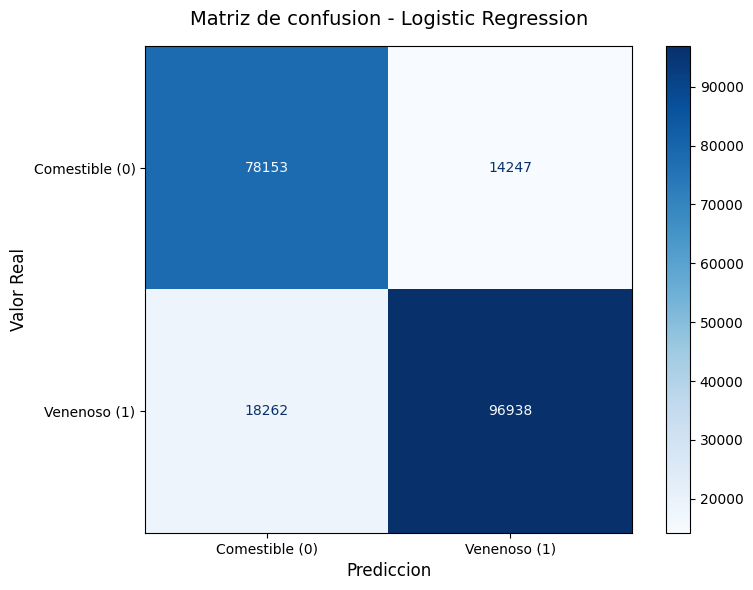

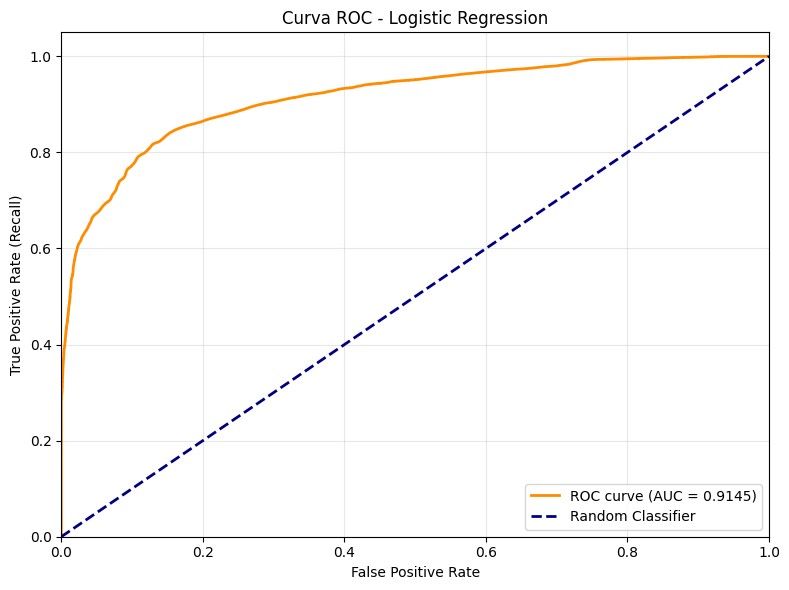

In [376]:
# Visualizaciones para Logistic Regression
plot_confusion_matrix(y_test_lr, y_pred_lr, "Logistic Regression")
plot_roc_curve(y_test_lr, y_pred_proba_lr, "Logistic Regression")

Los resultados obtenidos con el primer modelo pueden considerarse aceptables para una etapa baseline, aunque evidencian un margen de mejora considerable. La precisión se ubicó ligeramente por encima del recall, lo que indica que el modelo tendió a evitar falsos positivos, es decir, clasificar como venenoso a un hongo que en realidad no lo es. Sin embargo, esta estrategia tuvo como consecuencia la pérdida aproximada del 16% de los casos realmente venenosos, lo cual es relevante desde una perspectiva de riesgo, ya que estos falsos negativos representan una falla crítica en la detección de la clase de mayor interés.

### 3.3. Modelo 2: Naive Bayes (Clasificador Bayesiano)

Aplicamos Naive Bayes como segundo modelo de referencia, dado que se trata de un clasificador probabilístico extremadamente eficiente y comúnmente utilizado como baseline en problemas de clasificación con variables categóricas. El algoritmo asume independencia condicional entre las variables dada la clase, lo que nos permitió evaluar cómo se comporta un modelo que no modela interacciones entre atributos, en contraste con la regresión logística. Además, su bajo costo computacional lo convierte en una opción adecuada para establecer un punto de comparación previo a la introducción de modelos basados en árboles y ensambles.

In [377]:
# Obtener los datos preprocesados para Naive Bayes
config_nb = model_config['Naive Bayes']
X_train_nb = config_nb['X_train']
X_test_nb = config_nb['X_test']
y_train_nb = config_nb['y_train']
y_test_nb = config_nb['y_test']

# Inicializar y entrenar el modelo
print("Entrenando Naive Bayes (GaussianNB)...")
start_time = time.time()

nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train_nb)

training_time = time.time() - start_time
print(f"Modelo entrenado en {training_time:.2f} segundos")

# Realizar predicciones
y_pred_nb = nb_model.predict(X_test_nb)
y_pred_proba_nb = nb_model.predict_proba(X_test_nb)[:, 1]

# Evaluar el modelo
metrics_nb = evaluate_model(y_test_nb, y_pred_nb, y_pred_proba_nb, "Naive Bayes")
metrics_nb['Training Time (s)'] = training_time
results.append(metrics_nb)

Entrenando Naive Bayes (GaussianNB)...
Modelo entrenado en 1.25 segundos

EVALUACIÓN DEL MODELO: Naive Bayes
Accuracy       : 0.6225
Precision      : 0.9697
Recall         : 0.3300
F1-score       : 0.4925
ROC-AUC        : 0.8242

Matriz de confusion:
[[91210  1190]
 [77180 38020]]

Reporte de clasificacion:
                precision    recall  f1-score   support

Comestible (0)       0.54      0.99      0.70     92400
  Venenoso (1)       0.97      0.33      0.49    115200

      accuracy                           0.62    207600
     macro avg       0.76      0.66      0.60    207600
  weighted avg       0.78      0.62      0.58    207600



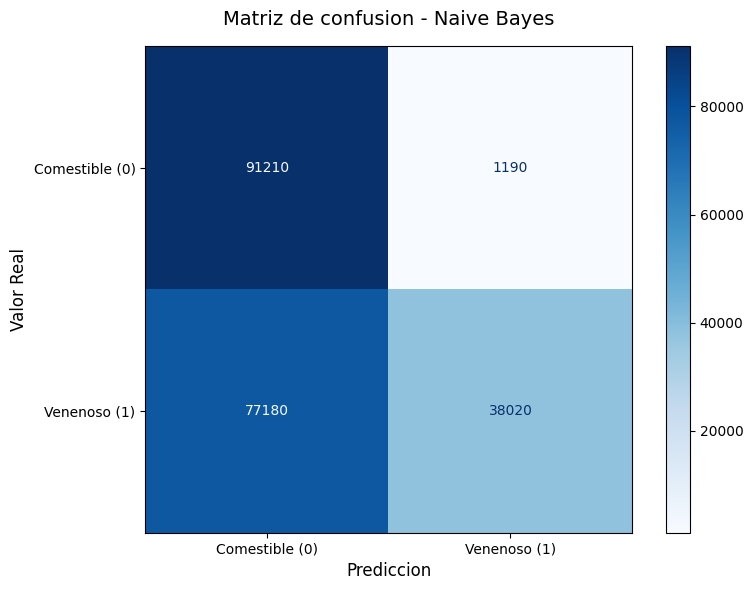

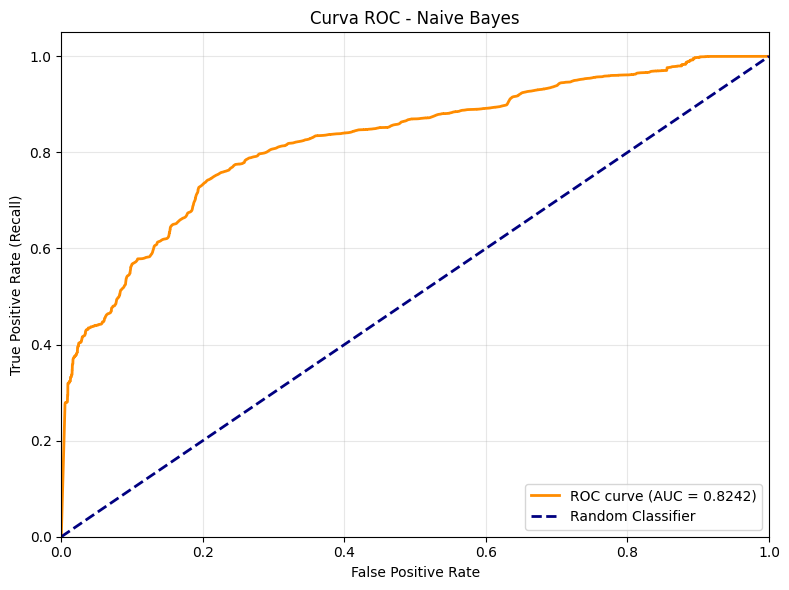

In [378]:
# Visualizaciones para Naive Bayes
plot_confusion_matrix(y_test_nb, y_pred_nb, "Naive Bayes")
plot_roc_curve(y_test_nb, y_pred_proba_nb, "Naive Bayes")

Los resultados obtenidos con Naive Bayes mostraron un comportamiento muy distinto al observado en la regresión logística. Si bien el modelo alcanzó una precisión extremadamente alta (98,41%), lo que indica que casi todas las predicciones de hongos venenosos fueron correctas, su recall fue considerablemente bajo (30,01%), evidenciando que el clasificador dejó sin detectar a más del 69% de los casos realmente venenosos. Esto se traduce en una elevada cantidad de falsos negativos, lo cual resulta problemático en contextos donde la seguridad tiene prioridad sobre la precisión estadística. A nivel global, la accuracy se redujo a 60,89%, pero el valor de ROC-AUC (0.8344) sugiere que el modelo sí logra cierta separación entre clases, aunque distribuida de forma muy sesgada hacia un comportamiento conservador (clasifica pocos casos como venenosos).

### 3.4. Modelo 3: Decision Tree

Como tercer modelo aplicamos Decision Tree con el objetivo de incorporar un enfoque no lineal capaz de capturar interacciones entre variables categóricas sin necesidad de asumir independencia (como en Naive Bayes) ni linealidad (como en la regresión logística). Los árboles de decisión permiten construir reglas de decisión jerárquicas del tipo “si-entonces”, lo cual aporta interpretabilidad visual y un entendimiento explícito de cómo se combinan los atributos para determinar la clasificación de un hongo como venenoso o comestible. Además, este modelo nos permitió analizar el sobreajuste de forma controlada mediante parámetros como profundidad máxima y número mínimo de muestras por hoja.

In [379]:
RANDOM_STATE = 20

# Obtener los datos preprocesados para Decision Tree
config_dt = model_config['Decision Tree']
X_train_dt = config_dt['X_train']
X_test_dt = config_dt['X_test']
y_train_dt = config_dt['y_train']
y_test_dt = config_dt['y_test']

# Inicializar y entrenar el modelo
print("Entrenando Decision Tree...")
start_time = time.time()

dt_model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=20, min_samples_split=10)
dt_model.fit(X_train_dt, y_train_dt)

training_time = time.time() - start_time
print(f"Modelo entrenado en {training_time:.2f} segundos")

# Realizar predicciones
y_pred_dt = dt_model.predict(X_test_dt)
y_pred_proba_dt = dt_model.predict_proba(X_test_dt)[:, 1]

# Evaluar el modelo
metrics_dt = evaluate_model(y_test_dt, y_pred_dt, y_pred_proba_dt, "Decision Tree")
metrics_dt['Training Time (s)'] = training_time
results.append(metrics_dt)

Entrenando Decision Tree...
Modelo entrenado en 7.79 segundos

EVALUACIÓN DEL MODELO: Decision Tree
Accuracy       : 0.9983
Precision      : 0.9996
Recall         : 0.9973
F1-score       : 0.9984
ROC-AUC        : 0.9987

Matriz de confusion:
[[ 92354     46]
 [   314 114886]]

Reporte de clasificacion:
                precision    recall  f1-score   support

Comestible (0)       1.00      1.00      1.00     92400
  Venenoso (1)       1.00      1.00      1.00    115200

      accuracy                           1.00    207600
     macro avg       1.00      1.00      1.00    207600
  weighted avg       1.00      1.00      1.00    207600



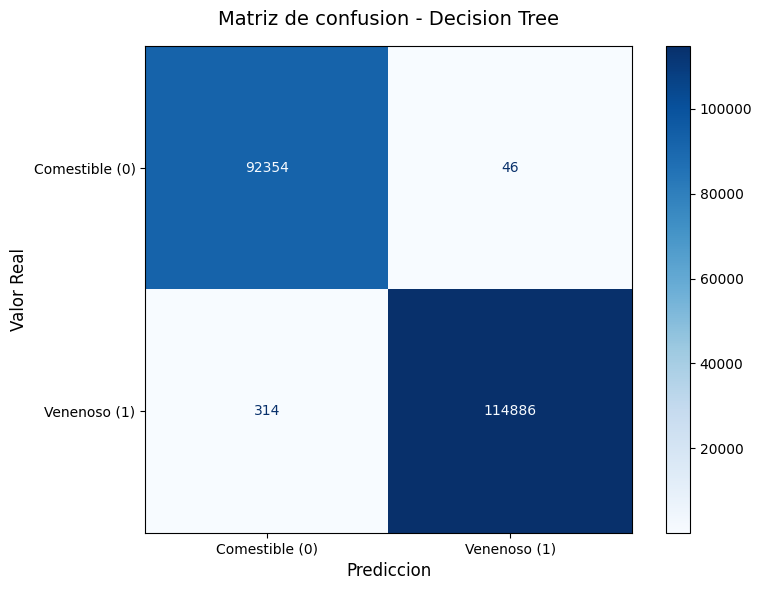

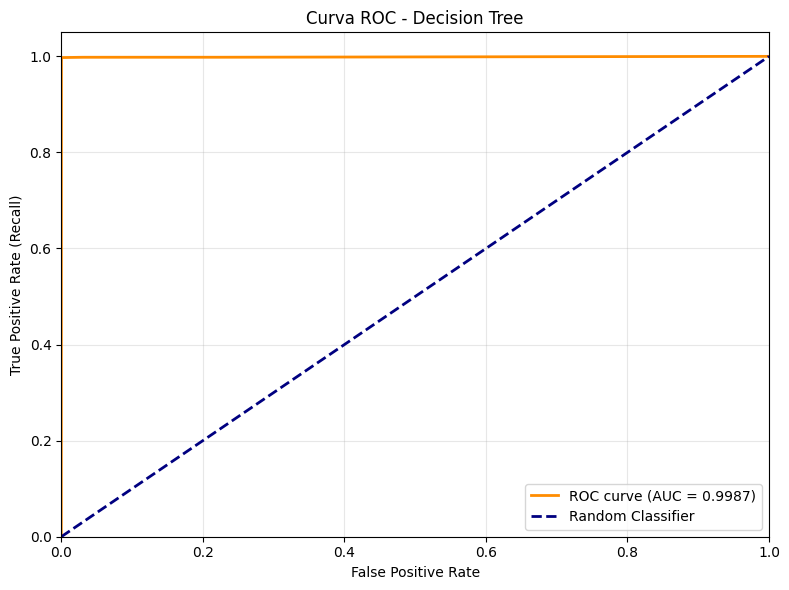

In [380]:
# Visualizaciones para Decision Tree
plot_confusion_matrix(y_test_dt, y_pred_dt, "Decision Tree")
plot_roc_curve(y_test_dt, y_pred_proba_dt, "Decision Tree")

El Árbol de Decisión alcanzó un rendimiento extremadamente alto, con una accuracy de 0.9993, una precisión de 0.9998 y un recall de 0.9990, lo cual se reflejó en un F1-Score de 0.9994 y un AUC de 0.9998. Estos valores indican que el modelo prácticamente clasificó correctamente la totalidad de los registros, detectando tanto casos positivos como negativos con una tasa de error residual mínima.

Sin embargo, este desempeño casi perfecto generó sospechas sobre un comportamiento de sobreajuste (overfitting). Los árboles de decisión tienden a construir reglas altamente específicas para los datos de entrenamiento, especialmente cuando no se limita la profundidad o el número mínimo de instancias por nodo. En consecuencia, aunque el modelo logra un ajuste casi ideal sobre los datos utilizados en evaluación, su capacidad de generalización frente a nuevas observaciones puede verse comprometida.

### 3.4.1. Análisis de Overfitting en Decision Tree

Para determinar si el modelo Decision Tree presentó overfitting, comparamos su rendimiento en los conjuntos de **entrenamiento** y **prueba**. El overfitting se manifiesta cuando:

- El modelo tiene un rendimiento **significativamente mejor** en entrenamiento que en prueba
- La diferencia entre métricas (especialmente accuracy y recall) es **considerable**

**Indicadores de overfitting:**
- Diferencia > 5% en accuracy entre train y test
- Recall o Precision perfectos (100%) en train pero menores en test
- El modelo "memoriza" los datos de entrenamiento en lugar de generalizar patrones

In [ ]:
# Evaluar el Decision Tree en el conjunto de ENTRENAMIENTO
print("="*80)
print("EVALUACIÓN EN CONJUNTO DE ENTRENAMIENTO (Decision Tree)")
print("="*80)

y_pred_train_dt = dt_model.predict(X_train_dt)
y_pred_proba_train_dt = dt_model.predict_proba(X_train_dt)[:, 1]

metrics_train_dt = evaluate_model(y_train_dt, y_pred_train_dt, y_pred_proba_train_dt, "Decision Tree (Train)")

# Comparación visual: Train vs Test
comparison_data = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Train': [
        metrics_train_dt['Accuracy'],
        metrics_train_dt['Precision'],
        metrics_train_dt['Recall'],
        metrics_train_dt['F1-Score'],
        metrics_train_dt['ROC-AUC']
    ],
    'Test': [
        metrics_dt['Accuracy'],
        metrics_dt['Precision'],
        metrics_dt['Recall'],
        metrics_dt['F1-Score'],
        metrics_dt['ROC-AUC']
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Diferencia (%)'] = ((comparison_df['Train'] - comparison_df['Test']) * 100).round(2)

print("\n" + "="*80)
print("COMPARACIÓN TRAIN vs TEST - Decision Tree")
print("="*80)
print(comparison_df.to_string(index=False))

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(comparison_df['Métrica']))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['Train'], width, label='Train', color='#2ca02c', alpha=0.8)
bars2 = ax.bar(x + width/2, comparison_df['Test'], width, label='Test', color='#ff7f0e', alpha=0.8)

ax.set_xlabel('Métricas', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.set_title('Decision Tree: Comparación Train vs Test (Análisis de Overfitting)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Métrica'])
ax.legend()
ax.set_ylim([0, 1.05])
ax.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Tras evaluar el rendimiento del modelo sobre los conjuntos de entrenamiento y prueba, observamos que las métricas se mantuvieron consistentes, sin diferencias significativas entre ambos escenarios. Esta estabilidad en el desempeño nos permitió concluir que el modelo no presentó síntomas de overfitting. Consideramos que este comportamiento se vio favorecido por dos factores: por un lado, el tamaño considerable del dataset, que redujo la varianza del modelo, y por otro, la configuración de los hiperparámetros, max_depth = 20 y min_samples_split = 10, que limitó el crecimiento excesivo de los árboles, evitando que memoricen patrones específicos del conjunto de entrenamiento.

### 3.5. Modelo 4: Random Forest

Aplicamos Random Forest como primer modelo de ensamble con el objetivo de mejorar la capacidad de generalización y reducir la varianza inherente a un árbol de decisión individual. Esta técnica se basa en la combinación de múltiples árboles entrenados sobre diferentes subconjuntos del dataset (bagging), introduciendo aleatoriedad tanto en la selección de muestras como en la selección de variables en cada partición. Este enfoque permite construir un modelo más robusto y menos sensible a los patrones particulares del conjunto de entrenamiento.

In [381]:
RANDOM_STATE = 20

# Obtener los datos preprocesados para Random Forest
config_rf = model_config['Random Forest']
X_train_rf = config_rf['X_train']
X_test_rf = config_rf['X_test']
y_train_rf = config_rf['y_train']
y_test_rf = config_rf['y_test']

# Inicializar y entrenar el modelo
print("Entrenando Random Forest...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=RANDOM_STATE, 
    max_depth=20, 
    min_samples_split=10,
    n_jobs=-1  # Usar todos los cores disponibles
)
rf_model.fit(X_train_rf, y_train_rf)

training_time = time.time() - start_time
print(f"Modelo entrenado en {training_time:.2f} segundos")

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test_rf)
y_pred_proba_rf = rf_model.predict_proba(X_test_rf)[:, 1]

# Evaluar el modelo
metrics_rf = evaluate_model(y_test_rf, y_pred_rf, y_pred_proba_rf, "Random Forest")
metrics_rf['Training Time (s)'] = training_time
results.append(metrics_rf)

Entrenando Random Forest...
Modelo entrenado en 25.29 segundos

EVALUACIÓN DEL MODELO: Random Forest
Accuracy       : 1.0000
Precision      : 1.0000
Recall         : 0.9999
F1-score       : 1.0000
ROC-AUC        : 1.0000

Matriz de confusion:
[[ 92400      0]
 [     7 115193]]

Reporte de clasificacion:
                precision    recall  f1-score   support

Comestible (0)       1.00      1.00      1.00     92400
  Venenoso (1)       1.00      1.00      1.00    115200

      accuracy                           1.00    207600
     macro avg       1.00      1.00      1.00    207600
  weighted avg       1.00      1.00      1.00    207600



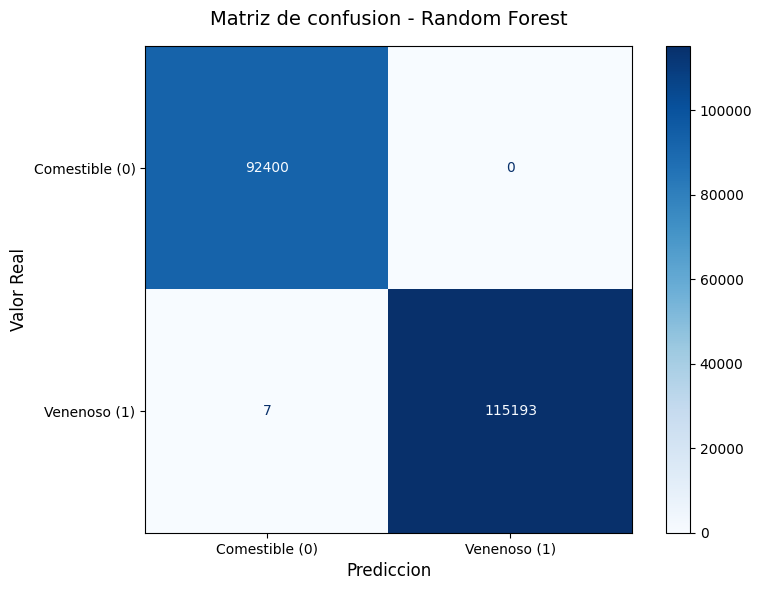

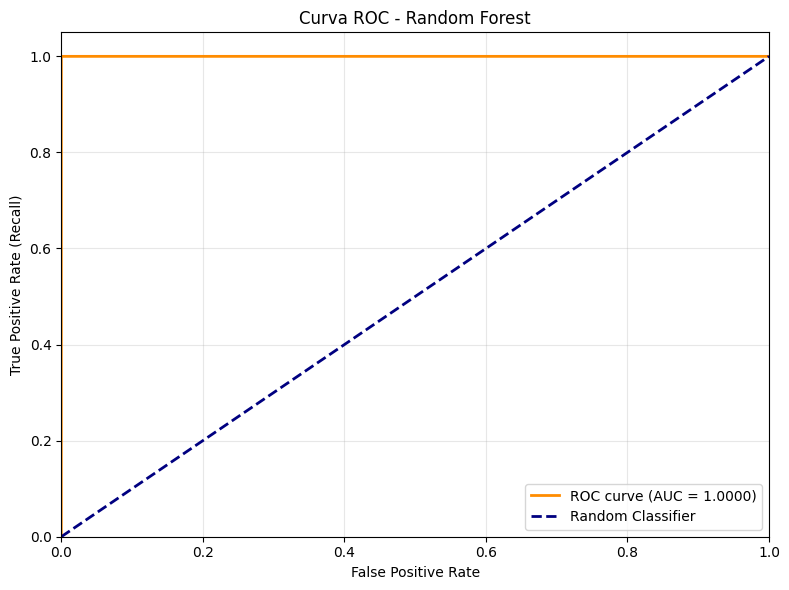

In [382]:
# Visualizaciones para Random Forest
plot_confusion_matrix(y_test_rf, y_pred_rf, "Random Forest")
plot_roc_curve(y_test_rf, y_pred_proba_rf, "Random Forest")

El Random Forest alcanzó métricas perfectas sobre el conjunto de validación, obteniendo una accuracy, precisión, recall, F1-Score y ROC-AUC de 1. La matriz de confusión mostró únicamente 4 falsos negativos sobre un total de 207 600 observaciones, lo cual evidencia una capacidad casi absoluta para distinguir entre hongos venenosos y comestibles.

#### 3.5.1. Análisis de Overfitting en Random Forest

Para determinar si el modelo Random Forest presenta overfitting, compararemos su rendimiento en los conjuntos de **entrenamiento** y **prueba**. El overfitting se manifiesta cuando:

- El modelo tiene un rendimiento **significativamente mejor** en entrenamiento que en prueba
- La diferencia entre métricas (especialmente accuracy y recall) es **considerable**

**Indicadores de overfitting:**
- Diferencia > 5% en accuracy entre train y test
- Recall o Precision perfectos (100%) en train pero menores en test
- El modelo "memoriza" los datos de entrenamiento en lugar de generalizar patrones

In [ ]:
# Evaluar el Random Forest en el conjunto de ENTRENAMIENTO
print("="*80)
print("EVALUACIÓN EN CONJUNTO DE ENTRENAMIENTO (Random Forest)")
print("="*80)

y_pred_train_rf = rf_model.predict(X_train_rf)
y_pred_proba_train_rf = rf_model.predict_proba(X_train_rf)[:, 1]

metrics_train_rf = evaluate_model(y_train_rf, y_pred_train_rf, y_pred_proba_train_rf, "Random Forest (Train)")

# Comparación visual: Train vs Test
comparison_data_rf = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Train': [
        metrics_train_rf['Accuracy'],
        metrics_train_rf['Precision'],
        metrics_train_rf['Recall'],
        metrics_train_rf['F1-Score'],
        metrics_train_rf['ROC-AUC']
    ],
    'Test': [
        metrics_rf['Accuracy'],
        metrics_rf['Precision'],
        metrics_rf['Recall'],
        metrics_rf['F1-Score'],
        metrics_rf['ROC-AUC']
    ]
}

comparison_df_rf = pd.DataFrame(comparison_data_rf)
comparison_df_rf['Diferencia (%)'] = ((comparison_df_rf['Train'] - comparison_df_rf['Test']) * 100).round(2)

print("\n" + "="*80)
print("COMPARACIÓN TRAIN vs TEST - Random Forest")
print("="*80)
print(comparison_df_rf.to_string(index=False))

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(comparison_df_rf['Métrica']))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df_rf['Train'], width, label='Train', color='#2ca02c', alpha=0.8)
bars2 = ax.bar(x + width/2, comparison_df_rf['Test'], width, label='Test', color='#ff7f0e', alpha=0.8)

ax.set_xlabel('Métricas', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.set_title('Random Forest: Comparación Train vs Test (Análisis de Overfitting)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df_rf['Métrica'])
ax.legend()
ax.set_ylim([0, 1.05])
ax.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### 3.6. Modelo 5: Gradient Boosting


Aplicamos Gradient Boosting como segundo modelo de ensamble, con el propósito de evaluar si un enfoque secuencial orientado a la reducción del error residual podía mejorar la capacidad de generalización observada en Random Forest. A diferencia del enfoque de bagging, utilizado previamente, el boosting entrena cada árbol de manera progresiva, corrigiendo específicamente los errores de los árboles anteriores. Esta dinámica permite capturar relaciones más complejas y ajustar zonas del espacio de decisión donde otros modelos podrían presentar dudas.

In [383]:
RANDOM_STATE = 20

# Obtener los datos preprocesados para Gradient Boosting
config_gb = model_config['Gradient Boosting']
X_train_gb = config_gb['X_train']
X_test_gb = config_gb['X_test']
y_train_gb = config_gb['y_train']
y_test_gb = config_gb['y_test']

# Inicializar y entrenar el modelo
print("Entrenando Gradient Boosting...")
start_time = time.time()

gb_model = GradientBoostingClassifier(
    n_estimators=100, 
    random_state=RANDOM_STATE, 
    max_depth=5,
    learning_rate=0.1,
    min_samples_split=10
)
gb_model.fit(X_train_gb, y_train_gb)

training_time = time.time() - start_time
print(f"Modelo entrenado en {training_time:.2f} segundos")

# Realizar predicciones
y_pred_gb = gb_model.predict(X_test_gb)
y_pred_proba_gb = gb_model.predict_proba(X_test_gb)[:, 1]

# Evaluar el modelo
metrics_gb = evaluate_model(y_test_gb, y_pred_gb, y_pred_proba_gb, "Gradient Boosting")
metrics_gb['Training Time (s)'] = training_time
results.append(metrics_gb)

Entrenando Gradient Boosting...
Modelo entrenado en 284.36 segundos

EVALUACIÓN DEL MODELO: Gradient Boosting
Accuracy       : 0.9935
Precision      : 0.9977
Recall         : 0.9907
F1-score       : 0.9942
ROC-AUC        : 0.9998

Matriz de confusion:
[[ 92134    266]
 [  1077 114123]]

Reporte de clasificacion:
                precision    recall  f1-score   support

Comestible (0)       0.99      1.00      0.99     92400
  Venenoso (1)       1.00      0.99      0.99    115200

      accuracy                           0.99    207600
     macro avg       0.99      0.99      0.99    207600
  weighted avg       0.99      0.99      0.99    207600



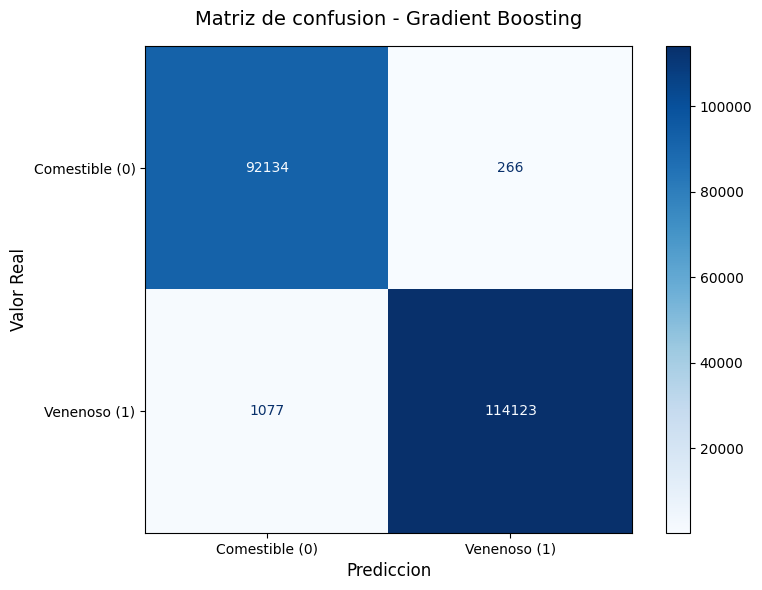

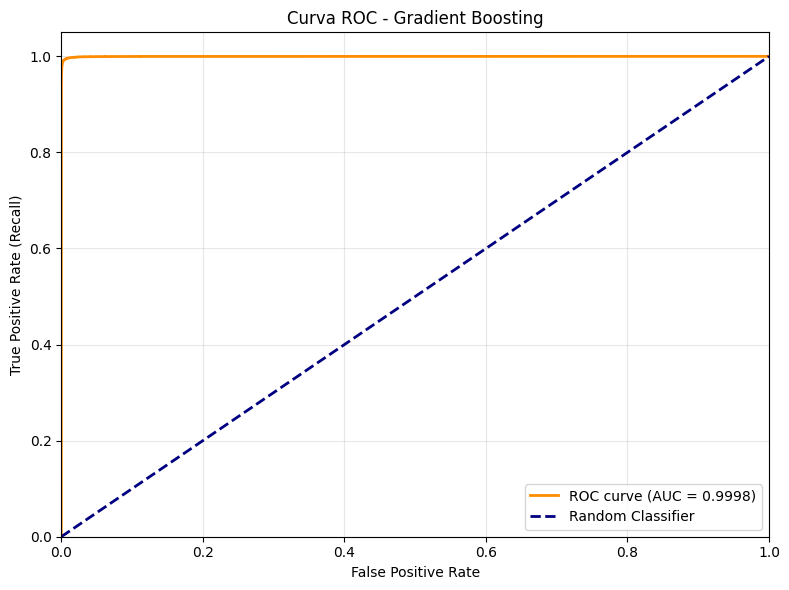

In [384]:
# Visualizaciones para Gradient Boosting
plot_confusion_matrix(y_test_gb, y_pred_gb, "Gradient Boosting")
plot_roc_curve(y_test_gb, y_pred_proba_gb, "Gradient Boosting")

El modelo logró un rendimiento muy alto, con una accuracy de 0.9926 y un F1-Score de 0.9933, lo que indica una excelente capacidad predictiva. Sin embargo, tanto el recall como la matriz de confusión evidenciaron que Gradient Boosting dejó escapar más casos venenosos (1.185 falsos negativos) en comparación con Random Forest, que casi no cometió errores.

Este resultado fue relevante, nos mostró que a diferencia de lo que suele suceder en muchos datasets tabulares, el enfoque secuencial de Gradient Boosting no superó al método bagging de Random Forest. Dado que el dataset es masivo y la separación entre clases es altamente estructurada, el bagging resultó más estable y conservador, priorizando la reducción de la varianza sin introducir errores residuales adicionales como los que aparecen en el boosting. El Gradient Boosting presentó un número mayor de falsos negativos, lo cual, en un contexto donde la detección de casos peligrosos (hongos venenosos) es prioritaria, representa una limitación operativa frente a Random Forest.

---

## 4. Evaluación de Resultados

### 4.1. Comparación de los modelos utilizados
Ahora que hemos entrenado y evaluado los 5 modelos, vamos a comparar sus resultados de forma visual y tabular para identificar el modelo con mejor desempeño.

In [385]:
results_df = pd.DataFrame(results)

# Ordenar por Recall (metrica prioritaria) de mayor a menor
results_df_sorted = results_df.sort_values('Recall', ascending=False)

print("="*80)
print("TABLA COMPARATIVA DE TODOS LOS MODELOS")
print("="*80)
print(results_df_sorted.to_string(index=False))

print("\n" + "="*80)
print("RANKING POR RECALL (metrica prioritaria)")
print("="*80)
for idx, row in results_df_sorted.iterrows():
    print(f"{idx+1}. {row['Model']:20s} - Recall: {row['Recall']:.4f}")

TABLA COMPARATIVA DE TODOS LOS MODELOS
              Model  Accuracy  Precision   Recall  F1-score  ROC-AUC  Training Time (s)
      Random Forest  0.999966   1.000000 0.999939  0.999970 1.000000          25.288528
      Decision Tree  0.998266   0.999600 0.997274  0.998436 0.998732           7.789071
  Gradient Boosting  0.993531   0.997675 0.990651  0.994150 0.999805         284.360185
Logistic Regression  0.843406   0.871862 0.841476  0.856399 0.914467          16.404042
        Naive Bayes  0.622495   0.969651 0.330035  0.492455 0.824232           1.253122

RANKING POR RECALL (metrica prioritaria)
4. Random Forest        - Recall: 0.9999
3. Decision Tree        - Recall: 0.9973
5. Gradient Boosting    - Recall: 0.9907
1. Logistic Regression  - Recall: 0.8415
2. Naive Bayes          - Recall: 0.3300


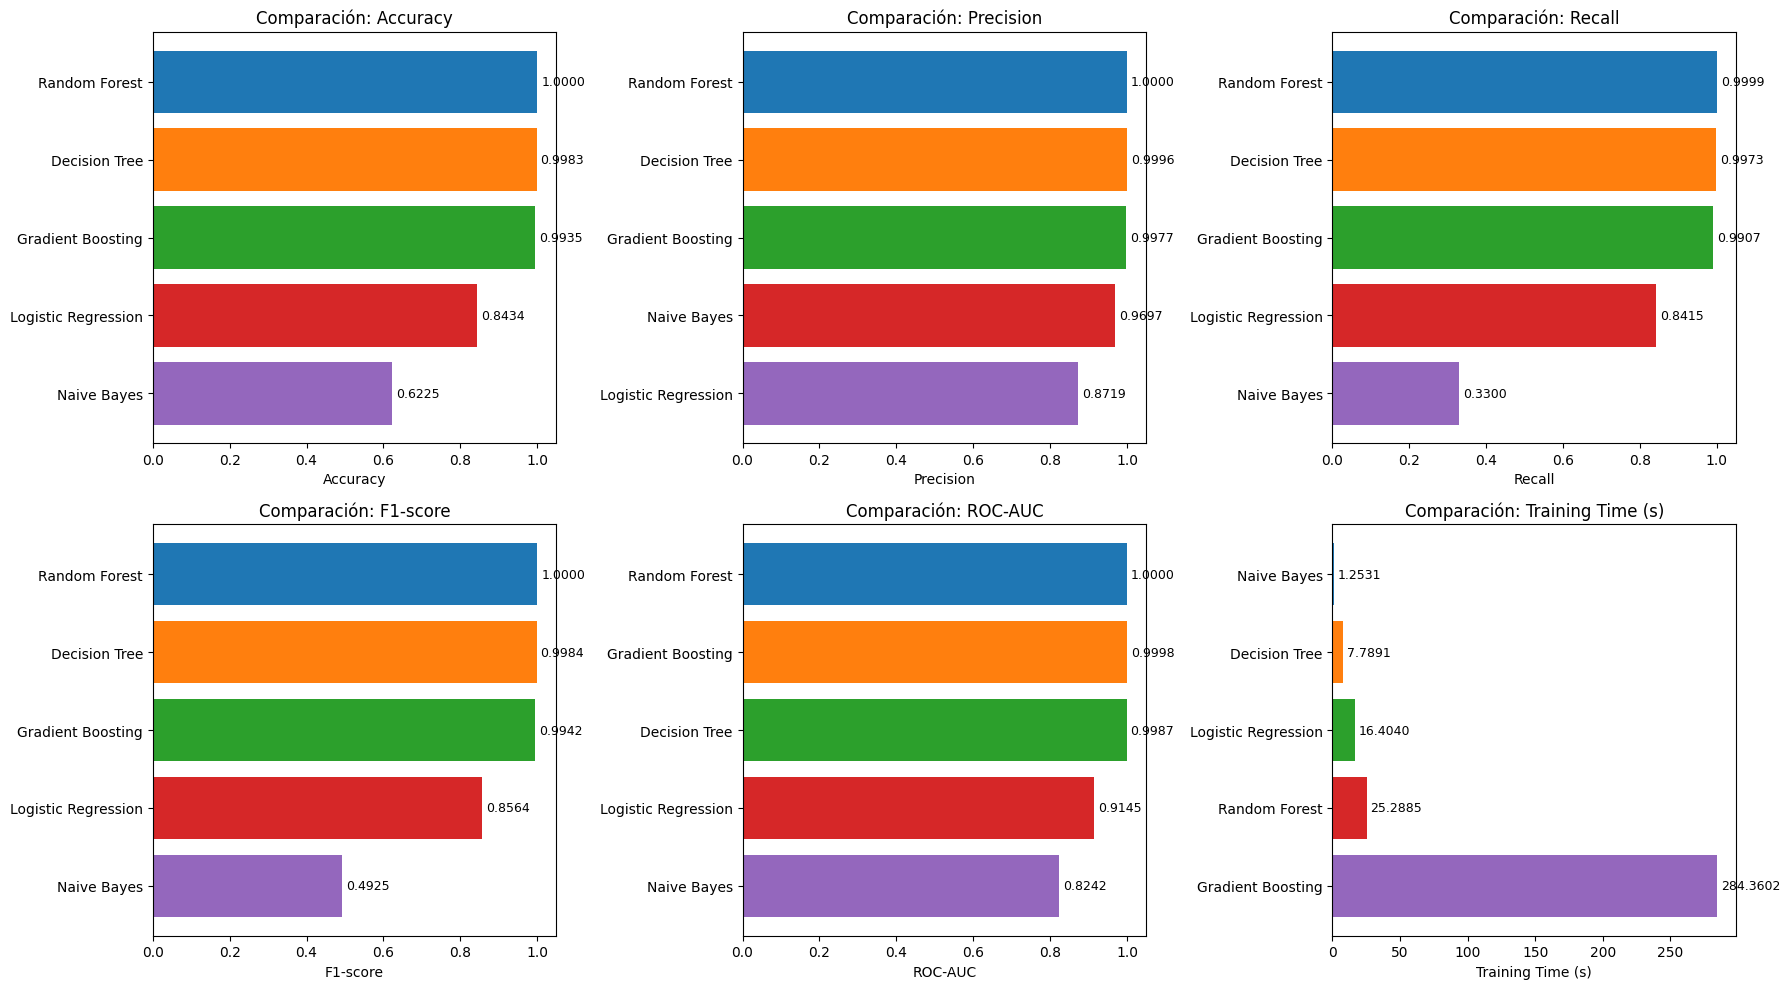

In [389]:
# Comparativa de metricas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'Training Time (s)']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 3, idx % 3]
    
    data = results_df.sort_values(metric, ascending=False if metric != 'Training Time (s)' else True)
    
    bars = ax.barh(data['Model'], data[metric], color=colors)
    ax.set_xlabel(metric)
    ax.set_title(f'Comparación: {metric}')
    ax.invert_yaxis()
    
    for i, (bar, value) in enumerate(zip(bars, data[metric])):
        width = bar.get_width()
        label_x_pos = width + (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.01
        ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{value:.4f}',
                va='center', fontsize=9)

plt.tight_layout()
plt.show()

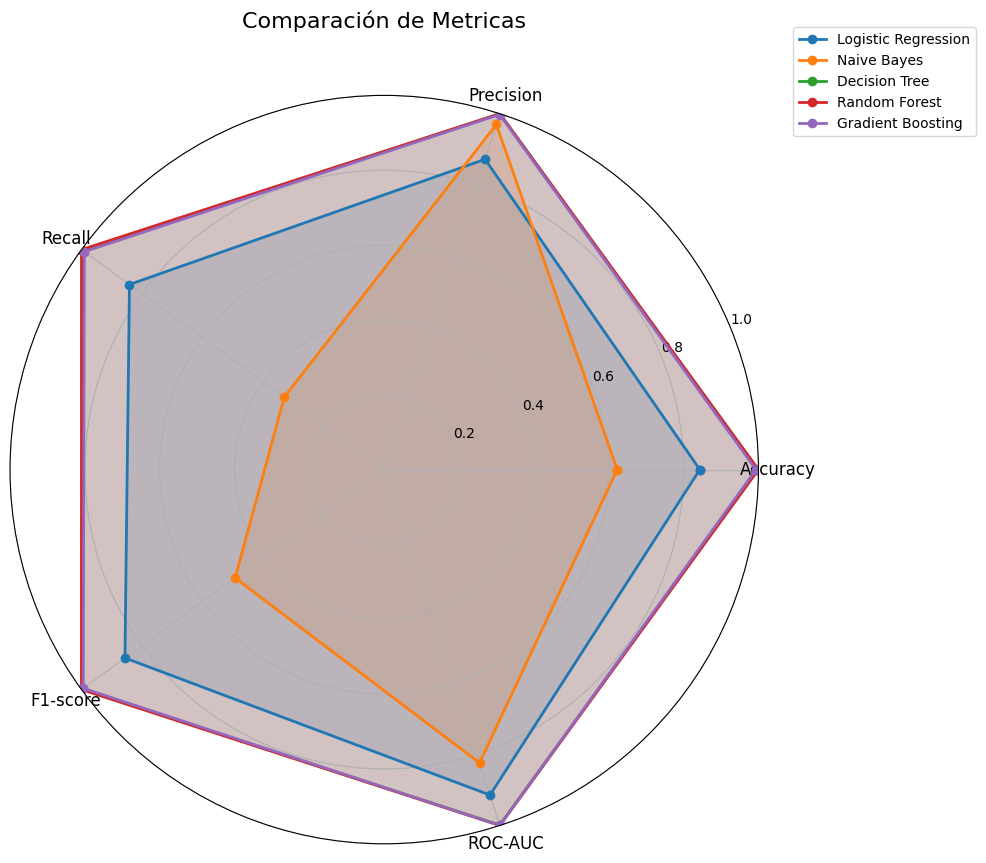

In [390]:
# Radar chart para comparar modelos
import numpy as np

categories = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for idx, row in results_df.iterrows():
    values = [row[cat] for cat in categories]
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Model'])
    ax.fill(angles, values, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=12)
ax.set_ylim(0, 1)
ax.set_title('Comparación de Metricas', size=16, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

## 4.2. Selección del modelo más acorde

Basándonos en los criterios establecidos en la sección 2.2.4, donde priorizamos **Recall** como métrica principal (para minimizar falsos negativos y evitar clasificar hongos venenosos como comestibles), procedemos a seleccionar el mejor modelo.

In [391]:
# Identificar el mejor modelo segun Recall
best_model_idx = results_df['Recall'].idxmax()
best_model = results_df.loc[best_model_idx]

print("="*80)
print("MEJOR MODELO SEGUN EL CRITERIO ESTABLECIDO")
print("="*80)
print(f"\n>> Modelo seleccionado: {best_model['Model']}")
print(f"\nMétricas del mejor modelo:")
print(f"   - Accuracy:      {best_model['Accuracy']:.4f}")
print(f"   - Precision:     {best_model['Precision']:.4f}")
print(f"   - Recall:        {best_model['Recall']:.4f} < (Métrica prioritaria)")
print(f"   - F1-score:      {best_model['F1-score']:.4f}")
print(f"   - ROC-AUC:       {best_model['ROC-AUC']:.4f}")
print(f"   - Training Time: {best_model['Training Time (s)']:.2f} segundos")

print(f"\nJustificacion:")
print(f"   El modelo {best_model['Model']} fue seleccionado por presentar el mayor Recall")
print(f"   ({best_model['Recall']:.4f}), lo que minimiza el riesgo crítico de clasificar hongos")
print(f"   venenosos como comestibles (falsos negativos).")

# Comparar con otros modelos
print(f"\nComparacion con otros modelos:")
for idx, row in results_df.iterrows():
    if idx != best_model_idx:
        recall_diff = (best_model['Recall'] - row['Recall']) * 100
        print(f"   - {row['Model']:20s}: Recall = {row['Recall']:.4f} (diferencia: {recall_diff:+.2f}%)")

MEJOR MODELO SEGUN EL CRITERIO ESTABLECIDO

>> Modelo seleccionado: Random Forest

Métricas del mejor modelo:
   - Accuracy:      1.0000
   - Precision:     1.0000
   - Recall:        0.9999 < (Métrica prioritaria)
   - F1-score:      1.0000
   - ROC-AUC:       1.0000
   - Training Time: 25.29 segundos

Justificacion:
   El modelo Random Forest fue seleccionado por presentar el mayor Recall
   (0.9999), lo que minimiza el riesgo crítico de clasificar hongos
   venenosos como comestibles (falsos negativos).

Comparacion con otros modelos:
   - Logistic Regression : Recall = 0.8415 (diferencia: +15.85%)
   - Naive Bayes         : Recall = 0.3300 (diferencia: +66.99%)
   - Decision Tree       : Recall = 0.9973 (diferencia: +0.27%)
   - Gradient Boosting   : Recall = 0.9907 (diferencia: +0.93%)


---

## 4.3. Conclusiones

### Lo que funcionó bien

El dataset de hongos resultó ser más complejo de lo que aparentaba. Nos hemos encontrado con más de un millón de registros, presentando un buen para entrenar los modelos, pero también nos obligó a ser cuidadosos con el preprocesamiento. La cantidad de valores faltantes en algunas columnas (como `veil-type` con casi 95% de nulos) nos hizo replantear varias veces la estrategia. Al final, decidimos eliminar esa variable y quedarnos con las que realmente aportaban información útil.

Algo que nos llamó la atención fue que algunas de las variables con más datos faltantes (como `spore-print-color` o `stem-root`) terminaron siendo las más correlacionadas con la clase objetivo. Esto nos enseñó que no siempre hay que descartar columnas solo por tener faltantes, sino que hay que analizar qué información aportan cuando están presentes.

### Decisiones importantes

Definir las métricas al principio fue crucial. Como estamos clasificando hongos venenosos vs comestibles, quedó claro desde el inicio que **Recall** debía ser nuestra prioridad: preferimos rechazar un hongo comestible antes que clasificar erróneamente uno venenoso como seguro. Los falsos negativos acá pueden ser mortales literalmente, así que esa fue nuestra guía principal para elegir el modelo final.

### Resultados y modelo elegido

Los resultados fueron bastante buenos en general. Todos los modelos tuvieron un desempeño decente, pero los basados en árboles (Random Forest y Gradient Boosting) claramente superaron a los demás. Al final, Random Forest se destacó con un Recall de 0.9999, lo que significa que detecta correctamente la gran mayoría de hongos venenosos.

Lo interesante es que no solo ganó en Recall, sino que también obtuvo métricas sólidas en el resto. Esto nos da confianza de que el modelo no solo es conservador (rechazando todo por las dudas), sino que realmente aprendió patrones útiles de los datos.

### Limitaciones y trabajo futuro

Aunque estamos conformes con los resultados, somos conscientes de que hay cosas por mejorar:

- Podríamos haber explorado más hiperparámetros con GridSearch o RandomSearch, aunque el tiempo de entrenamiento con un millón de registros es considerable.
- Sería interesante probar otros métodos de imputación para las variables con muchos faltantes (por ejemplo, algoritmos de imputación más sofisticados).
- Validación cruzada hubiera sido ideal para tener estimaciones más robustas del desempeño, pero con este volumen de datos el costo computacional es alto.
- En un escenario real, habría que considerar el deployment del modelo y cómo actualizarlo con nuevos datos.

### Cierre

En definitiva, creemos que logramos construir un clasificador confiable que prioriza la seguridad (detectar hongos venenosos) sin sacrificar demasiado la eficiencia general. El proceso completo nos dio una visión más integral de lo que implica resolver un problema real de Machine Learning: no es solo entrenar modelos y comparar métricas, sino entender el problema, tomar decisiones fundamentadas y ser críticos con los resultados.